# Enabling GPU and testing GPU

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib

device_list= tf.test.gpu_device_name()
device_list

device_lib.list_local_devices()
!cat /proc/meminfo

MemTotal:       13297228 kB
MemFree:         9860696 kB
MemAvailable:   12358100 kB
Buffers:           62340 kB
Cached:          2588060 kB
SwapCached:            0 kB
Active:           725792 kB
Inactive:        2509324 kB
Active(anon):        876 kB
Inactive(anon):   546784 kB
Active(file):     724916 kB
Inactive(file):  1962540 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1488 kB
Writeback:             0 kB
AnonPages:        584784 kB
Mapped:           450964 kB
Shmem:              1172 kB
KReclaimable:     102796 kB
Slab:             131360 kB
SReclaimable:     102796 kB
SUnreclaim:        28564 kB
KernelStack:        4160 kB
PageTables:         8352 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6648612 kB
Committed_AS:    2724664 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        8920 kB
VmallocChunk:          0 kB
Percpu:          

Importing the Dependencies

In [ ]:
import statistics
import csv
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame

diabetes_dataset = pd.read_csv('/content/drive/MyDrive/Csv file/Normalization-Dataset.csv')

Loading Datset to Seaborn

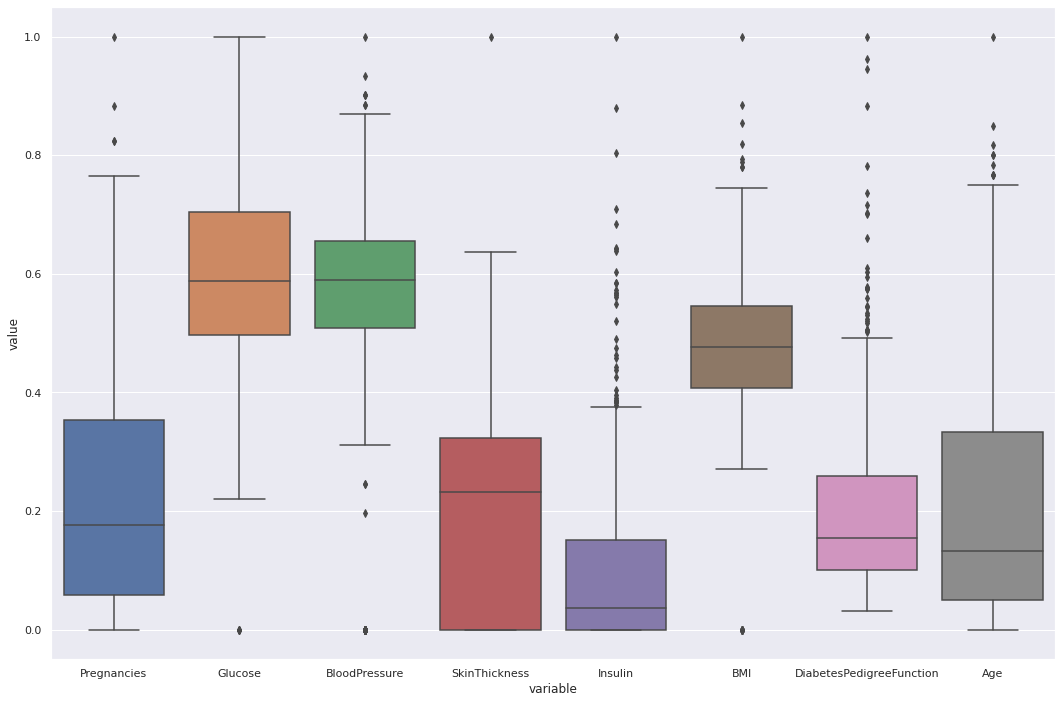

In [ ]:
sns.set_theme(style="whitegrid")
dataframe = pd.read_csv('/content/drive/MyDrive/Csv file/Normalization-Dataset.csv')

Pregnancies = dataframe["Pregnancies"]
Glucose = dataframe["Glucose"]
BloodPressure = dataframe["BloodPressure"]
SkinThickness = dataframe["SkinThickness"]
Insulin = dataframe["Insulin"]
BMI = dataframe["BMI"]
DiabetesPedigreeFunction = dataframe["DiabetesPedigreeFunction"]
Age = dataframe["Age"]

sns.set(rc = {'figure.figsize':(18,12)})
df = pd.DataFrame(data=dataframe, columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age" ])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

Violin Plot


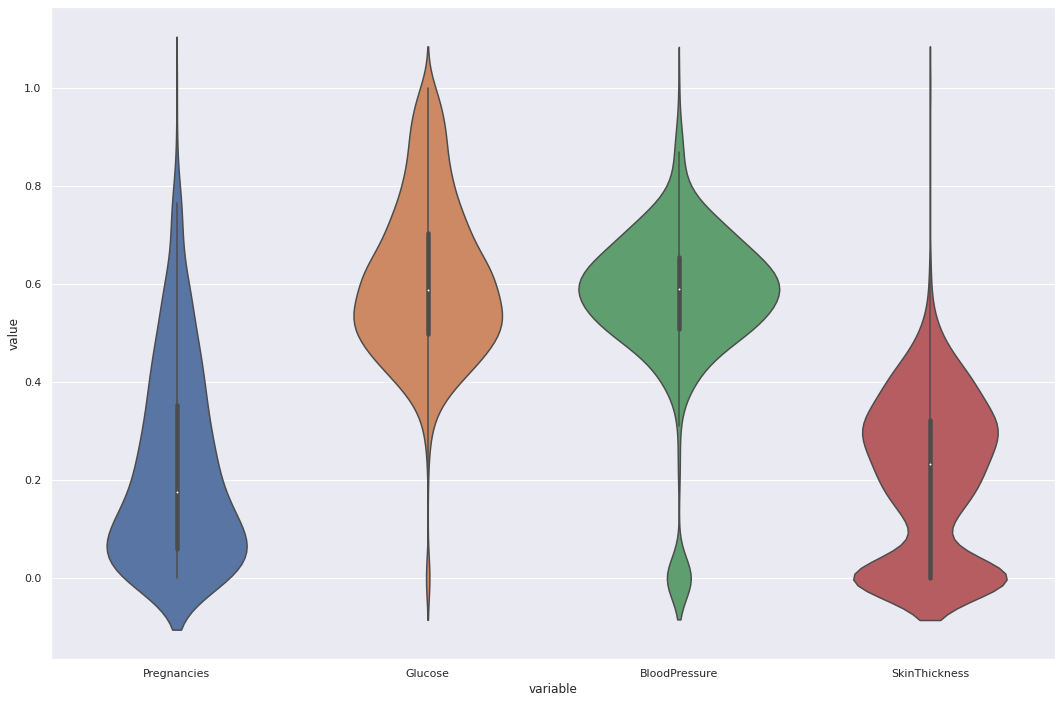

In [ ]:
sns.set_theme(style="whitegrid")
dataframe = pd.read_csv('/content/drive/MyDrive/Csv file/Normalization-Dataset.csv')

Pregnancies = dataframe["Pregnancies"]
Glucose = dataframe["Glucose"]
BloodPressure = dataframe["BloodPressure"]
SkinThickness = dataframe["SkinThickness"]
"""Insulin = dataframe["Insulin"]
BMI = dataframe["BMI"]
DiabetesPedigreeFunction = dataframe["DiabetesPedigreeFunction"]
Age = dataframe["Age"] """

sns.set(rc = {'figure.figsize':(18,12)})
df = pd.DataFrame(data=dataframe, columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness"])
sns.violinplot(x="variable", y="value", data=pd.melt(df))
plt.show()

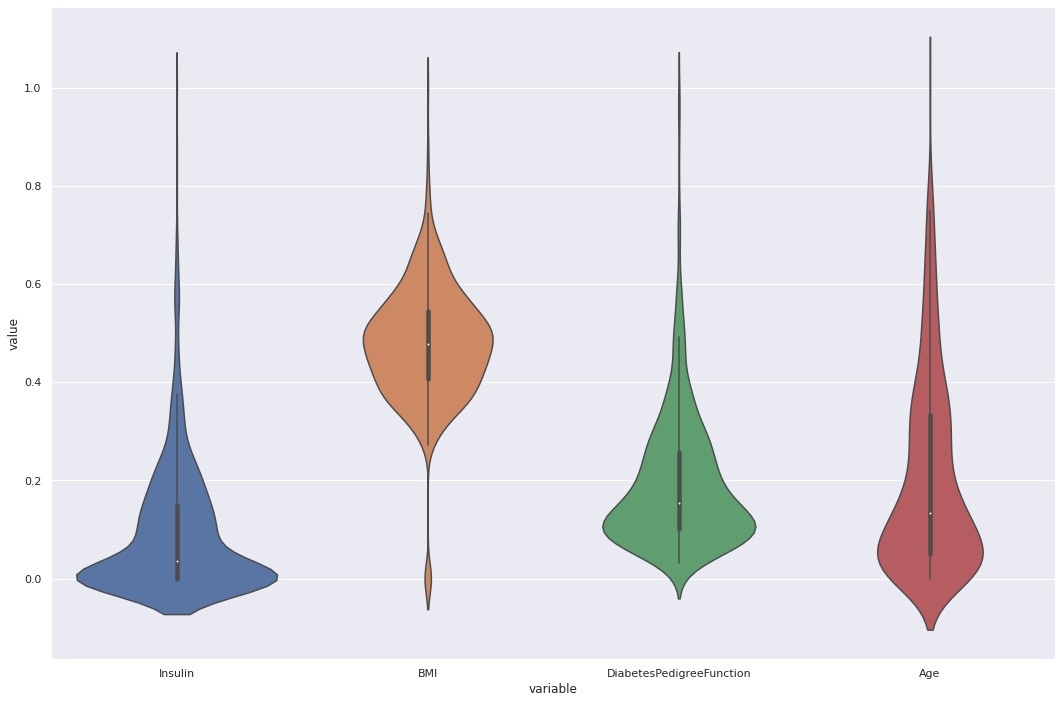

In [ ]:
sns.set_theme(style="whitegrid")
dataframe = pd.read_csv('/content/drive/MyDrive/Csv file/Normalization-Dataset.csv')

Insulin = dataframe["Insulin"]
BMI = dataframe["BMI"]
DiabetesPedigreeFunction = dataframe["DiabetesPedigreeFunction"]
Age = dataframe["Age"]


sns.set(rc = {'figure.figsize':(18,12)})
df = pd.DataFrame(data=dataframe, columns=["Insulin","BMI","DiabetesPedigreeFunction","Age" ])
sns.violinplot(x="variable", y="value", data=pd.melt(df))
plt.show()

Histogram Plot


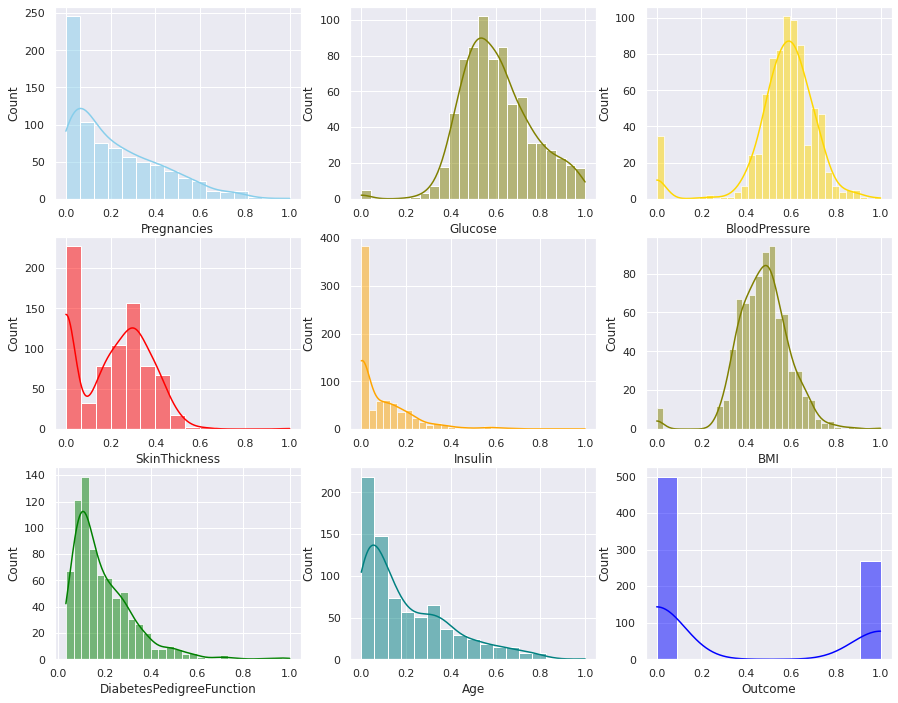

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")
#df = sns.load_dataset("iris")
df = pd.read_csv('/content/drive/MyDrive/Csv file/Normalization-Dataset.csv')

fig, axs = plt.subplots(3, 3, figsize=(15, 12))

sns.histplot(data=df, x="Pregnancies", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Glucose", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="BloodPressure", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="SkinThickness", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=df, x="Insulin", kde=True, color="orange", ax=axs[1, 1])
sns.histplot(data=df, x="BMI", kde=True, color="olive", ax=axs[1, 2])
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True, color="green", ax=axs[2, 0])
sns.histplot(data=df, x="Age", kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=df, x="Outcome", kde=True, color="blue", ax=axs[2, 2])
plt.show()

Mean and standard deviation


In [ ]:
diabetes_dataset.mean()

Pregnancies                 0.226180
Glucose                     0.607510
BloodPressure               0.566438
SkinThickness               0.207439
Insulin                     0.094326
BMI                         0.476790
DiabetesPedigreeFunction    0.194990
Age                         0.204015
Outcome                     0.348958
dtype: float64

In [ ]:
#print("Standard Deviation of the dataset is % s "%(statistics.stdev(diabetes_dataset)))
diabetes_dataset.std()

Pregnancies                 0.198210
Glucose                     0.160666
BloodPressure               0.158654
SkinThickness               0.161134
Insulin                     0.136222
BMI                         0.117499
DiabetesPedigreeFunction    0.136913
Age                         0.196004
Outcome                     0.476951
dtype: float64

Min and max values of all features

In [ ]:
print("Minimum value of all features",diabetes_dataset.min())

print("\n" + "Maximum value of all features",diabetes_dataset.max())

Minimum value of all features Pregnancies                 0.000000
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               0.000000
Insulin                     0.000000
BMI                         0.000000
DiabetesPedigreeFunction    0.032231
Age                         0.000000
Outcome                     0.000000
dtype: float64

Maximum value of all features Pregnancies                 1.0
Glucose                     1.0
BloodPressure               1.0
SkinThickness               1.0
Insulin                     1.0
BMI                         1.0
DiabetesPedigreeFunction    1.0
Age                         1.0
Outcome                     1.0
dtype: float64


Approach for Outliers

In [ ]:
print("Upper limit")
print(dataframe.mean() + 3*dataframe.std())
print("\n")
print("Lower limit")
print(dataframe.mean() - 3*dataframe.std())

print("\n")

dataframe_1=dataframe[(dataframe["Pregnancies"] > 0.820810957151961) | (dataframe["Pregnancies"] < -0.36845188853594524)]
dataframe_2=dataframe[(dataframe["Glucose"] > 1.089509) | (dataframe["Glucose"] < 0.125511)]
dataframe_3=dataframe[(dataframe["BloodPressure"] >  1.042401) | (dataframe["BloodPressure"] < 0.090476)]
dataframe_4=dataframe[(dataframe["SkinThickness"] > 0.690840) | (dataframe["SkinThickness"] < -0.275962)]
dataframe_5=dataframe[(dataframe["Insulin"] > 0.502992) | (dataframe["Insulin"] < -0.314341)]
dataframe_6=dataframe[(dataframe["BMI"] > 0.829286) | (dataframe["BMI"] < 0.124294)]
dataframe_7=dataframe[(dataframe["DiabetesPedigreeFunction"] > 0.605728) | (dataframe["DiabetesPedigreeFunction"] < -0.215748)]
dataframe_8=dataframe[(dataframe["Age"] >   0.792026) | (dataframe["Age"] < -0.383997)]

"Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"
print("For Pregnancies" + "\n",  dataframe_1, "\n" )
print("For Glucose" + "\n" , dataframe_2, "\n" )
print("For BloodPressure" + "\n" , dataframe_3, "\n" )
print("For SkinThickness"+ "\n" , dataframe_4, "\n" )
print("For Insulin" + "\n" , dataframe_5, "\n" )
print("For BMI" + "\n" ,  dataframe_6, "\n")
print("For DiabetesPedigreeFunction" + "\n" , dataframe_7, "\n" )
print("For Age" + "\n", dataframe_8, "\n")

Upper limit
Pregnancies                 0.820811
Glucose                     1.089509
BloodPressure               1.042401
SkinThickness               0.690840
Insulin                     0.502992
BMI                         0.829286
DiabetesPedigreeFunction    0.605728
Age                         0.792026
Outcome                     1.779812
dtype: float64


Lower limit
Pregnancies                -0.368452
Glucose                     0.125511
BloodPressure               0.090476
SkinThickness              -0.275962
Insulin                    -0.314341
BMI                         0.124294
DiabetesPedigreeFunction   -0.215748
Age                        -0.383997
Outcome                    -1.081896
dtype: float64


For Pregnancies
      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
88      0.882353  0.683417       0.573770       0.323232  0.130024  0.552906   
159     1.000000  0.819095       0.590164       0.414141  0.134752  0.609538   
298     0.823529  0

Trimming Outliers

In [ ]:
new_dataframe=dataframe[(dataframe["Pregnancies"] < 0.820810957151961) & (dataframe["Pregnancies"] > -0.36845188853594524)]
new_dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.433333,1


In [ ]:
new_dataframe_1=new_dataframe[(new_dataframe["Glucose"] < 1.089509) & (new_dataframe["Glucose"] > 0.125511)]
new_dataframe_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.433333,1


In [ ]:
new_dataframe_2 = new_dataframe_1[(new_dataframe_1["BloodPressure"] <  1.042401) & (new_dataframe_1["BloodPressure"] > 0.090476)]
new_dataframe_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.433333,1


In [ ]:
new_dataframe_3=new_dataframe_2[(new_dataframe_2["SkinThickness"] < 0.690840) & (new_dataframe_2["SkinThickness"] > -0.275962)]
new_dataframe_3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.433333,1


In [ ]:
new_dataframe_4=new_dataframe_3[(new_dataframe_3["Insulin"] < 0.502992) & (new_dataframe_3["Insulin"] > -0.314341)]
new_dataframe_4

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.433333,1


In [ ]:
new_dataframe_5=new_dataframe_4[(new_dataframe_4["BMI"] < 0.829286) & (new_dataframe_4["BMI"] > 0.124294)]
new_dataframe_5

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.433333,1


In [ ]:
new_dataframe_6=new_dataframe_5[(new_dataframe_5["DiabetesPedigreeFunction"] < 0.605728) & (new_dataframe_5["DiabetesPedigreeFunction"] > -0.215748)]
new_dataframe_6

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.000000,0
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.083058,0.150000,0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.433333,1


In [ ]:
new_dataframe_7=new_dataframe_6[(new_dataframe_6["Age"] <   0.792026) & (new_dataframe_6["Age"] > -0.383997)]
new_dataframe_7

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.000000,0
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.083058,0.150000,0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.433333,1


Export Pandas DataFrame to a CSV File

In [ ]:
#dtf = new_dataframe_7
dtf = pd.DataFrame(data=new_dataframe_7, columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome" ])
dtf.to_csv("Z score deviation outlier removal method dataframe.csv")
print (dtf)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
5       0.294118  0.582915       0.606557       0.000000  0.000000  0.381520   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [ ]:
new_diabetes_dataset = pd.read_csv('/content/drive/MyDrive/Csv file/Z score deviation outlier removal method dataframe.csv')

Box Plot after outlier

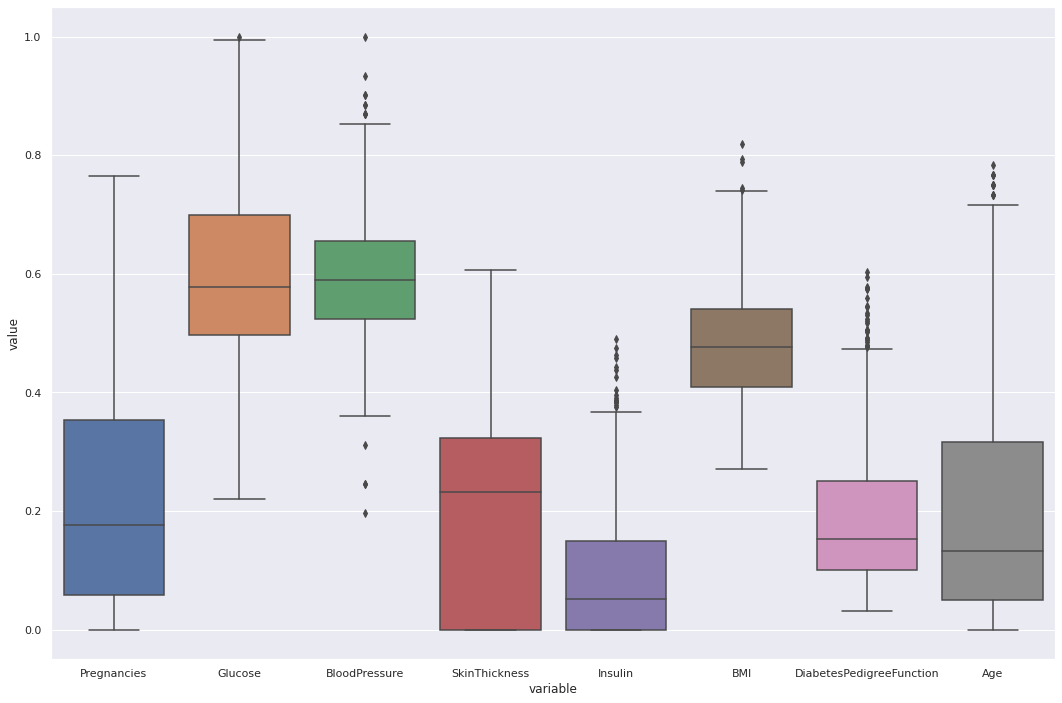

In [ ]:
sns.set_theme(style="whitegrid")
dataframe = pd.read_csv('/content/drive/MyDrive/Csv file/Z score deviation outlier removal method dataframe.csv')

Pregnancies = dataframe["Pregnancies"]
Glucose = dataframe["Glucose"]
BloodPressure = dataframe["BloodPressure"]
SkinThickness = dataframe["SkinThickness"]
Insulin = dataframe["Insulin"]
BMI = dataframe["BMI"]
DiabetesPedigreeFunction = dataframe["DiabetesPedigreeFunction"]
Age = dataframe["Age"]

sns.set(rc = {'figure.figsize':(18,12)})
df = pd.DataFrame(data=dataframe, columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age" ])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

In [ ]:
# printing the first 5 rows of the dataset
new_diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.000000,0
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.083058,0.150000,0


In [ ]:
# number of rows and Columns in this dataset
new_diabetes_dataset.shape

(688, 9)

In [ ]:
# getting the statistical measures of the data
new_diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,0.226231,0.604490,0.592999,0.209978,0.085706,0.480017,0.187833,0.201575,0.329942
std,0.192897,0.150783,0.100925,0.155610,0.106509,0.098642,0.117573,0.190617,0.470534
min,0.000000,0.221106,0.196721,0.000000,0.000000,0.271237,0.032231,0.000000,0.000000
25%,0.058824,0.497487,0.524590,0.000000,0.000000,0.408346,0.101240,0.050000,0.000000
50%,0.176471,0.577889,0.590164,0.232323,0.051418,0.476900,0.152893,0.133333,0.000000
75%,0.352941,0.698492,0.655738,0.323232,0.148936,0.540984,0.250207,0.316667,1.000000
max,0.764706,1.000000,1.000000,0.606061,0.490544,0.819672,0.603719,0.783333,1.000000


In [ ]:
new_diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               688 non-null    float64
 1   Glucose                   688 non-null    float64
 2   BloodPressure             688 non-null    float64
 3   SkinThickness             688 non-null    float64
 4   Insulin                   688 non-null    float64
 5   BMI                       688 non-null    float64
 6   DiabetesPedigreeFunction  688 non-null    float64
 7   Age                       688 non-null    float64
 8   Outcome                   688 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 48.5 KB


In [ ]:
new_diabetes_dataset['Outcome'].value_counts()

0    461
1    227
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
new_diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,0.195611,0.553887,0.580083,0.203795,0.077486,0.459401,0.170200,0.168655
1,0.288417,0.707259,0.619232,0.222534,0.102399,0.521885,0.223641,0.268429


Data Preprocessing

In [ ]:
# Now, we can look at where are missing values
new_diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# separating the data and labels
X = new_diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = new_diabetes_dataset['Outcome']


In [ ]:
print(X)
print(Y)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.294118  0.582915       0.606557       0.000000  0.000000  0.381520   
..           ...       ...            ...            ...       ...       ...   
683     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
684     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
685     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
686     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
687     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

Data Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.65735547  0.92404008 -0.02811548 ...  0.21028523  0.60651604
   1.47921983]
 [-0.86848989 -1.17708222 -0.51576542 ... -0.84806325 -0.36422044
  -0.18326505]
 [ 1.26769361  2.09133025 -0.67831541 ... -1.34699896  0.76478828
  -0.09576585]
 ...
 [ 0.3521864   0.0235591  -0.02811548 ... -0.90854031 -0.73703953
  -0.27076425]
 [-0.86848989  0.19031483 -1.00341537 ... -0.31888901 -0.37125476
   1.21672222]
 [-0.86848989 -0.91027304 -0.19066546 ... -0.27353122 -0.49083824
  -0.88325868]]


In [ ]:
X = standardized_data
Y = new_diabetes_dataset['Outcome']
print(X,Y)

[[ 0.65735547  0.92404008 -0.02811548 ...  0.21028523  0.60651604
   1.47921983]
 [-0.86848989 -1.17708222 -0.51576542 ... -0.84806325 -0.36422044
  -0.18326505]
 [ 1.26769361  2.09133025 -0.67831541 ... -1.34699896  0.76478828
  -0.09576585]
 ...
 [ 0.3521864   0.0235591  -0.02811548 ... -0.90854031 -0.73703953
  -0.27076425]
 [-0.86848989  0.19031483 -1.00341537 ... -0.31888901 -0.37125476
   1.21672222]
 [-0.86848989 -0.91027304 -0.19066546 ... -0.27353122 -0.49083824
  -0.88325868]] 0      1
1      0
2      1
3      0
4      0
      ..
683    0
684    0
685    0
686    1
687    0
Name: Outcome, Length: 688, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(688, 8) (550, 8) (138, 8)


Training the Model

## SVM with RBF kernel****

In [ ]:
classifier = svm.SVC(kernel='sigmoid',  gamma='auto' , verbose = True,  C=5 , decision_function_shape='ovo') #''',  max_iter=5, tol=0.001'''

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

[LibSVM]

SVC(C=5, decision_function_shape='ovo', gamma='auto', kernel='sigmoid',
    verbose=True)

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.6781818181818182


In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
X_test_prediction_svm_sigmoid = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
scores = cross_val_score(classifier, X, Y, cv=5)


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)
print(scores , "\n" )

Accuracy score of the test data :  0.717391304347826
[0.65942029 0.68115942 0.67391304 0.71532847 0.72992701] 



Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

[[73 19]
 [20 26]]


In [ ]:
print(classification_report(Y_test, X_test_prediction, digits=5, zero_division='warn'))

              precision    recall  f1-score   support

           0    0.78495   0.79348   0.78919        92
           1    0.57778   0.56522   0.57143        46

    accuracy                        0.71739       138
   macro avg    0.68136   0.67935   0.68031       138
weighted avg    0.71589   0.71739   0.71660       138



Plot confusion matrix

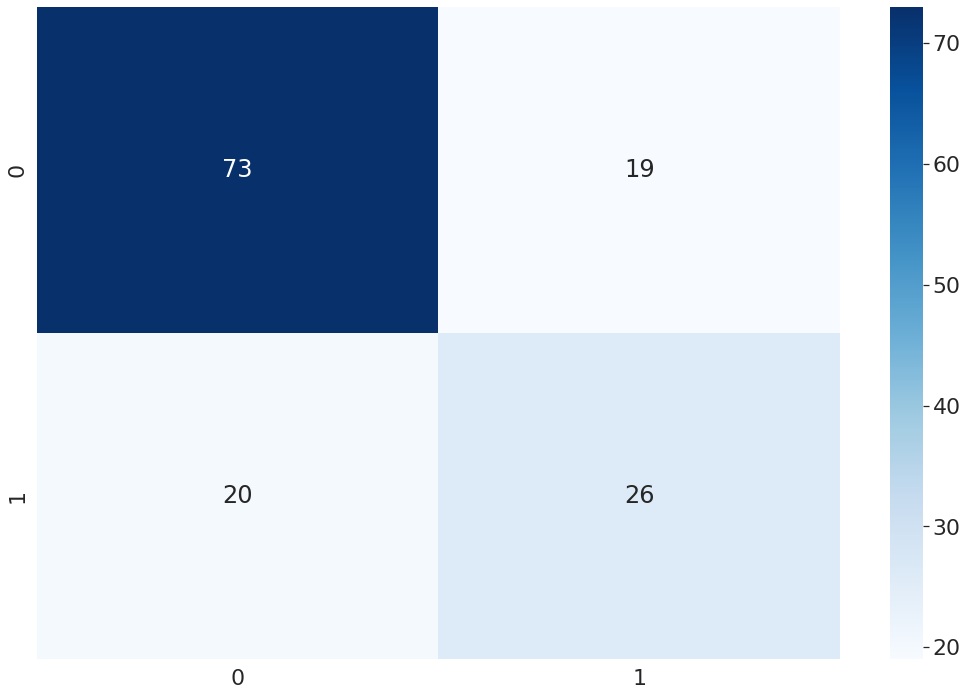

In [ ]:
y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)

In [ ]:
print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

Patient with Not Diabetes Correctly Detected (True Negatives):  73
Incorrectly Detected (False Positives):  19
Diabetes Patient Missed (False Negatives):  20
Diabetes Detected (True Positives):  26
Total Diabetes:  46
Sensitivy:  0.5652173913043478
Specificity:  0.7934782608695652


Model explainability With Explainable AI

SHAP





In [ ]:
#Load ML interpreting  models
!pip install shap lime
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 6.2 MB/s 
     |████████████████████████████████| 275 kB 49.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=6229c75fdb3f69a7f3cfef4ee5c217b8dc59d7991bb8055b99f49c9c03d08394
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
#initialize JS for plot
shap.initjs()

In [ ]:
 """ #Explainer
svm_explainer = shap.KernelExplainer(classifier.predict,X_train)

svm_shap_values_1 = svm_explainer.shap_values(X_train )
svm_shap_values_2 = svm_explainer.shap_values(X_test )

#Summary plot
shap.summary_plot(svm_shap_values_1, X_train)

shap.summary_plot(svm_shap_values_2, X_test) """





' #Explainer \nsvm_explainer = shap.KernelExplainer(classifier.predict,X_train)\n\nsvm_shap_values_1 = svm_explainer.shap_values(X_train )\nsvm_shap_values_2 = svm_explainer.shap_values(X_test )\n\n#Summary plot \nshap.summary_plot(svm_shap_values_1, X_train)\n\nshap.summary_plot(svm_shap_values_2, X_test) '

In [ ]:

"""#The dependence plot

shap.dependence_plot("Feature 0", svm_shap_values_2, X_test)

#The individual force plot
# plot the SHAP values for the 1th observation
shap.force_plot(svm_explainer.expected_value,svm_shap_values_2[1,:], X_test.iloc[1,:])


#The collective force plot
shap.force_plot(svm_explainer.expected_value, svm_shap_values_2, X_test)"""

'#The dependence plot\n\nshap.dependence_plot("Feature 0", svm_shap_values_2, X_test)\n\n#The individual force plot\n# plot the SHAP values for the 1th observation \nshap.force_plot(svm_explainer.expected_value,svm_shap_values_2[1,:], X_test.iloc[1,:])\n\n\n#The collective force plot\nshap.force_plot(svm_explainer.expected_value, svm_shap_values_2, X_test)'

##SVM with Polynomial kernel****

In [ ]:
import sklearn
model = sklearn.svm.SVC()
model.fit(X_train, Y_train)

SVC()

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8363636363636363


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
X_test_prediction_svm_ploy = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7681159420289855


In [ ]:
cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

[[81 11]
 [21 25]]


In [ ]:
print(classification_report(Y_test, X_test_prediction, digits=5))

              precision    recall  f1-score   support

           0    0.79412   0.88043   0.83505        92
           1    0.69444   0.54348   0.60976        46

    accuracy                        0.76812       138
   macro avg    0.74428   0.71196   0.72240       138
weighted avg    0.76089   0.76812   0.75995       138



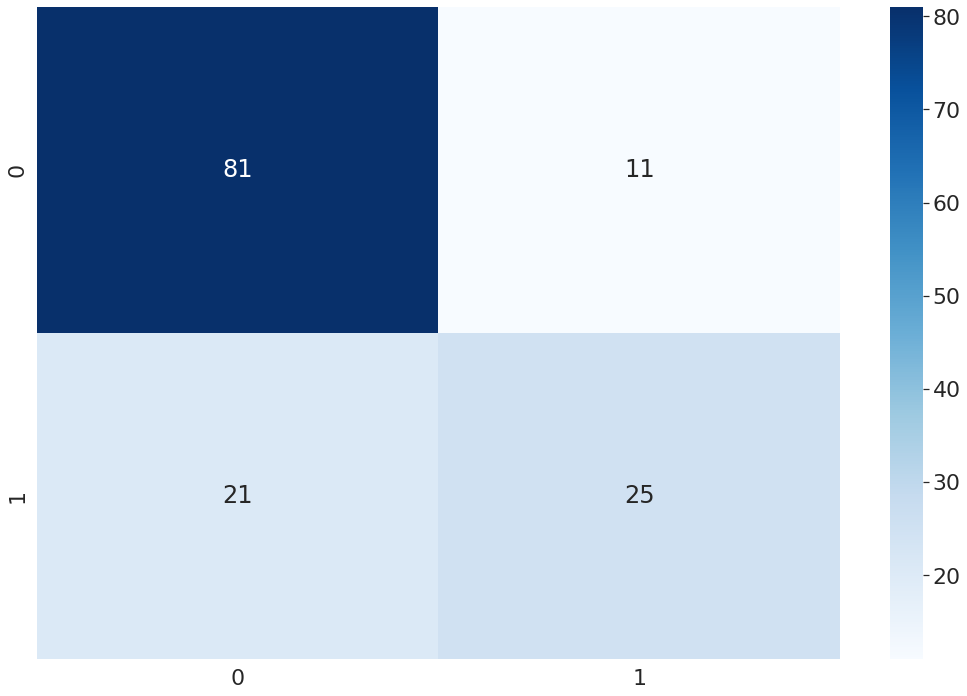

In [ ]:
y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)

In [ ]:
print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivityy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

Patient with Not Diabetes Correctly Detected (True Negatives):  81
Incorrectly Detected (False Positives):  11
Diabetes Patient Missed (False Negatives):  21
Diabetes Detected (True Positives):  25
Total Diabetes:  46
Sensitivityy:  0.5434782608695652
Specificity:  0.8804347826086957


In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [ ]:
fpr, tpr, thresholds  = metrics.roc_curve(Y_test, X_test_prediction)

In [ ]:
print(fpr, tpr, thresholds, )

[0.         0.11956522 1.        ] [0.         0.54347826 1.        ] [2 1 0]


In [ ]:
auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(auc)

0.7119565217391304


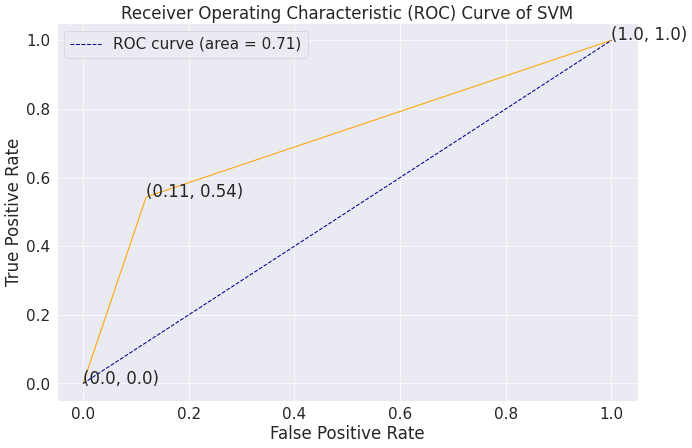

In [ ]:
#create ROC curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test_prediction)
#auc_svm = auc(fpr,tpr)
plt.figure(figsize=(15, 10), dpi=50)
plt.plot(fpr, tpr, color='orange',)
plt.plot([0,1],[0,1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)'% auc )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
for xy in zip(fpr,tpr):
   plt.annotate('(%.4s, %.4s)' % xy, xy=xy)
plt.title('Receiver Operating Characteristic (ROC) Curve of SVM')
plt.legend()
plt.show()




##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = sklearn.ensemble.RandomForestClassifier(n_estimators=500,criterion='entropy')
model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.782608695652174
[[81 11]
 [19 27]]
              precision    recall  f1-score   support

           0    0.81000   0.88043   0.84375        92
           1    0.71053   0.58696   0.64286        46

    accuracy                        0.78261       138
   macro avg    0.76026   0.73370   0.74330       138
weighted avg    0.77684   0.78261   0.77679       138

Patient with Not Diabetes Correctly Detected (True Negatives):  81
Incorrectly Detected (False Positives):  11
Diabetes Patient Missed (False Negatives):  19
Diabetes Detected (True Positives):  27
Total Diabetes:  46
Sensitivy:  0.5869565217391305
Specificity:  0.8804347826086957


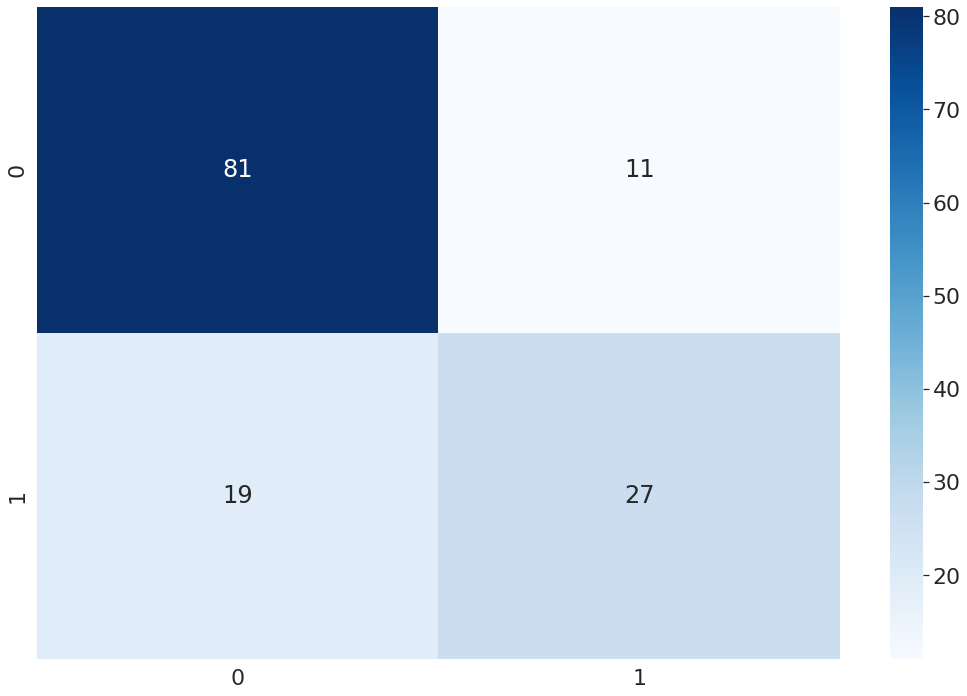

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test) #####
X_test_prediction_RFC = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

print(classification_report(Y_test, X_test_prediction, digits=5))

y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [ ]:
fpr, tpr, thresholds  = metrics.roc_curve(Y_test, X_test_prediction)

In [ ]:
print(fpr, tpr, thresholds,)

[0.         0.11956522 1.        ] [0.         0.58695652 1.        ] [2 1 0]


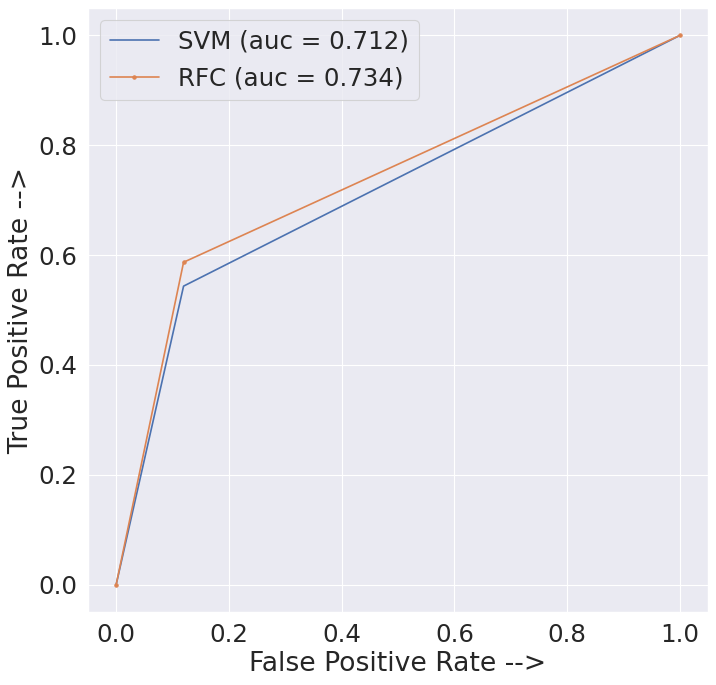

In [ ]:
from sklearn.metrics import roc_curve, auc

RFC_fpr, RFC_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_RFC)
auc_RFC = auc(RFC_fpr, RFC_tpr)

svm_fpr, svm_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_svm_ploy)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(10, 10), dpi=80)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.plot(RFC_fpr, RFC_tpr, marker='.', label='RFC (auc = %0.3f)' % auc_RFC)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()




In [ ]:
auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(auc)

0.733695652173913


##Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
model =  GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

Accuracy score of the training data :  0.7636363636363637
Accuracy score of the test data :  0.7536231884057971
[[75 17]
 [17 29]]
              precision    recall  f1-score   support

           0    0.81522   0.81522   0.81522        92
           1    0.63043   0.63043   0.63043        46

    accuracy                        0.75362       138
   macro avg    0.72283   0.72283   0.72283       138
weighted avg    0.75362   0.75362   0.75362       138

Patient with Not Diabetes Correctly Detected (True Negatives):  75
Incorrectly Detected (False Positives):  17
Diabetes Patient Missed (False Negatives):  17
Diabetes Detected (True Positives):  29
Total Diabetes:  46
Sensitivy:  0.6304347826086957
Specificity:  0.8152173913043478


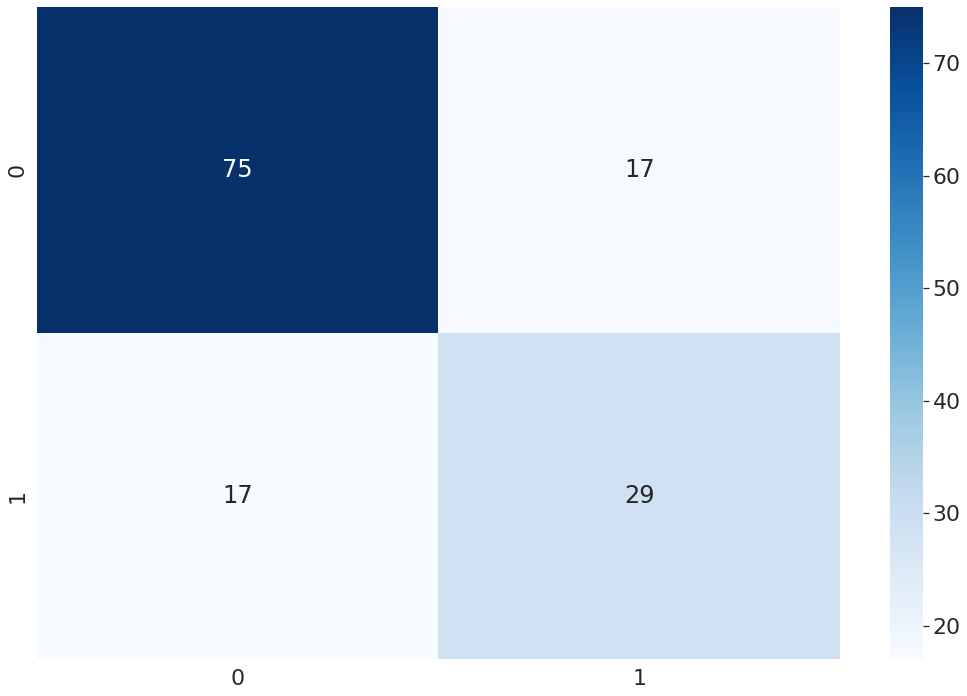

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
X_test_prediction_GNB = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

print(classification_report(Y_test, X_test_prediction, digits=5))

y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [ ]:
fpr, tpr, thresholds  = metrics.roc_curve(Y_test, X_test_prediction)

In [ ]:
print(fpr, tpr, thresholds, )

[0.         0.18478261 1.        ] [0.         0.63043478 1.        ] [2 1 0]


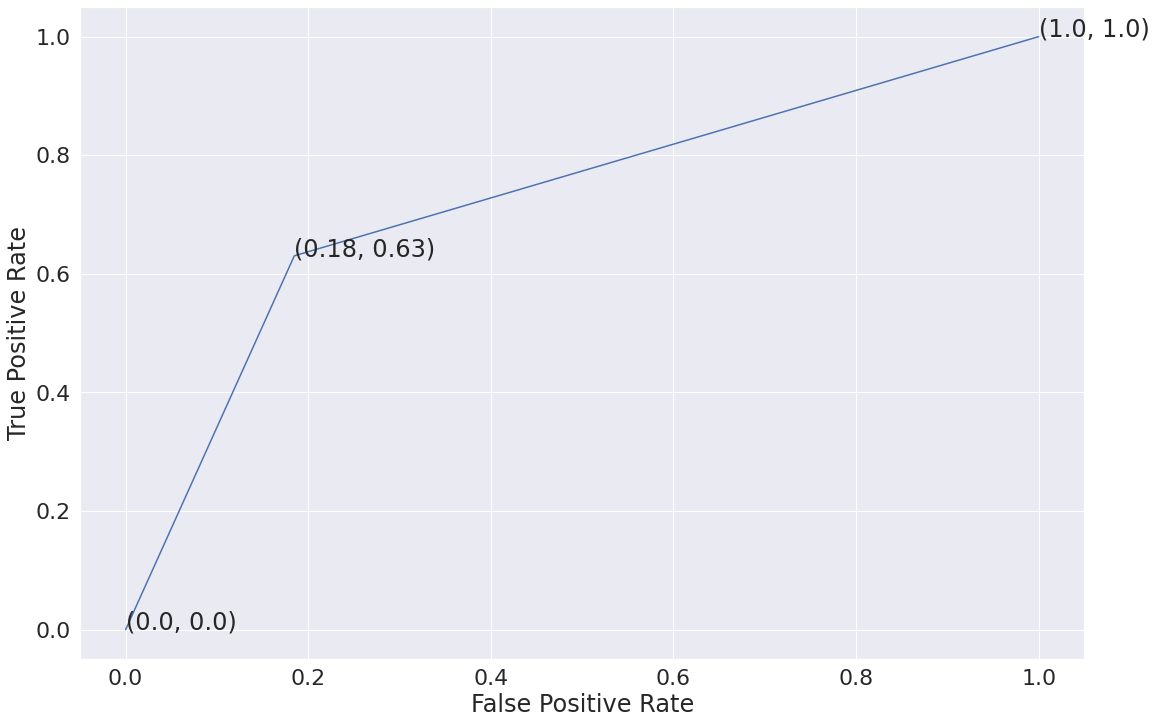

In [ ]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

for xy in zip(fpr,tpr):
   plt.annotate('(%.4s, %.4s)' % xy, xy=xy)

plt.show()

In [ ]:
auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(auc)

0.7228260869565218


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

Accuracy score of the training data :  1.0
Accuracy score of the test data :  0.7391304347826086
[[73 19]
 [17 29]]
              precision    recall  f1-score   support

           0    0.81111   0.79348   0.80220        92
           1    0.60417   0.63043   0.61702        46

    accuracy                        0.73913       138
   macro avg    0.70764   0.71196   0.70961       138
weighted avg    0.74213   0.73913   0.74047       138

Patient with Not Diabetes Correctly Detected (True Negatives):  73
Incorrectly Detected (False Positives):  19
Diabetes Patient Missed (False Negatives):  17
Diabetes Detected (True Positives):  29
Total Diabetes:  46
Sensitivy:  0.6304347826086957
Specificity:  0.7934782608695652


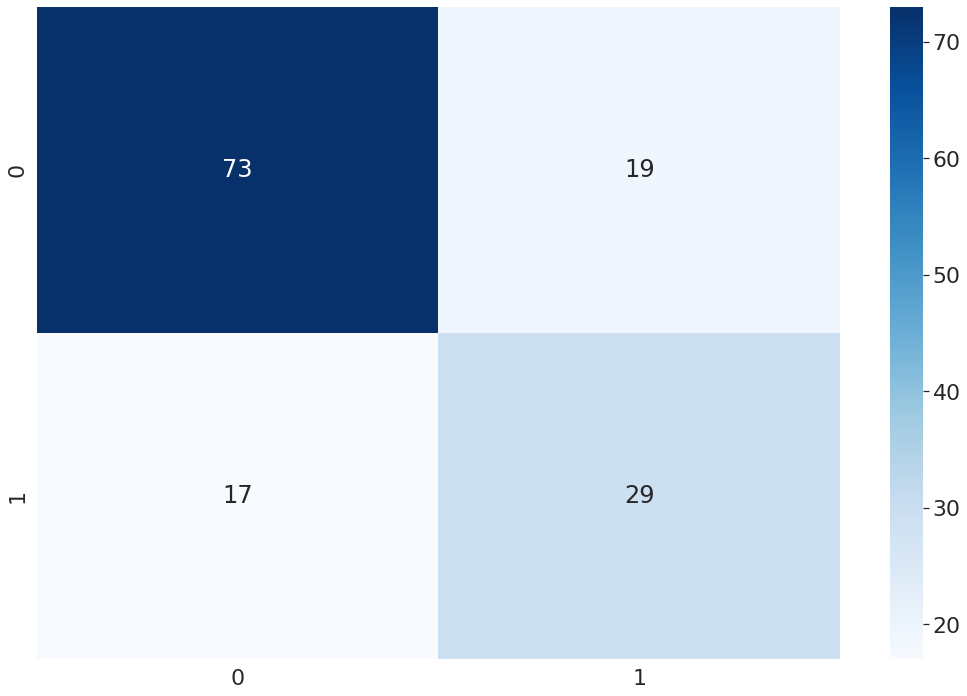

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
X_test_prediction_DT = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

print(classification_report(Y_test, X_test_prediction, digits=5))

y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [ ]:
fpr, tpr, thresholds  = metrics.roc_curve(Y_test, X_test_prediction)


In [ ]:
print(fpr, tpr, thresholds, )

[0.         0.20652174 1.        ] [0.         0.63043478 1.        ] [2 1 0]


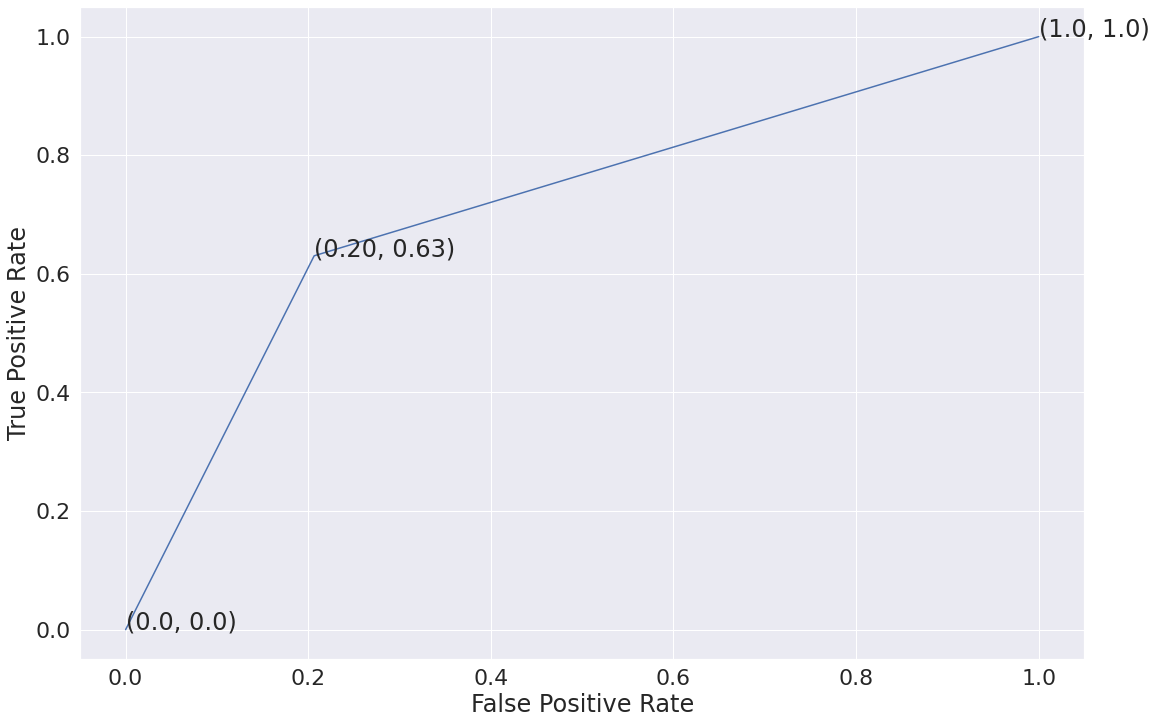

In [ ]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

for xy in zip(fpr,tpr):
   plt.annotate('(%.4s, %.4s)' % xy, xy=xy)

plt.show()

In [ ]:
auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(auc)

0.7119565217391305


##KNN

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier()

Accuracy score of the training data :  0.8090909090909091
Accuracy score of the test data :  0.782608695652174
[[81 11]
 [19 27]]
              precision    recall  f1-score   support

           0    0.81000   0.88043   0.84375        92
           1    0.71053   0.58696   0.64286        46

    accuracy                        0.78261       138
   macro avg    0.76026   0.73370   0.74330       138
weighted avg    0.77684   0.78261   0.77679       138

Patient with Not Diabetes Correctly Detected (True Negatives):  81
Incorrectly Detected (False Positives):  11
Diabetes Patient Missed (False Negatives):  19
Diabetes Detected (True Positives):  27
Total Diabetes:  46
Sensitivy:  0.5869565217391305
Specificity:  0.8804347826086957


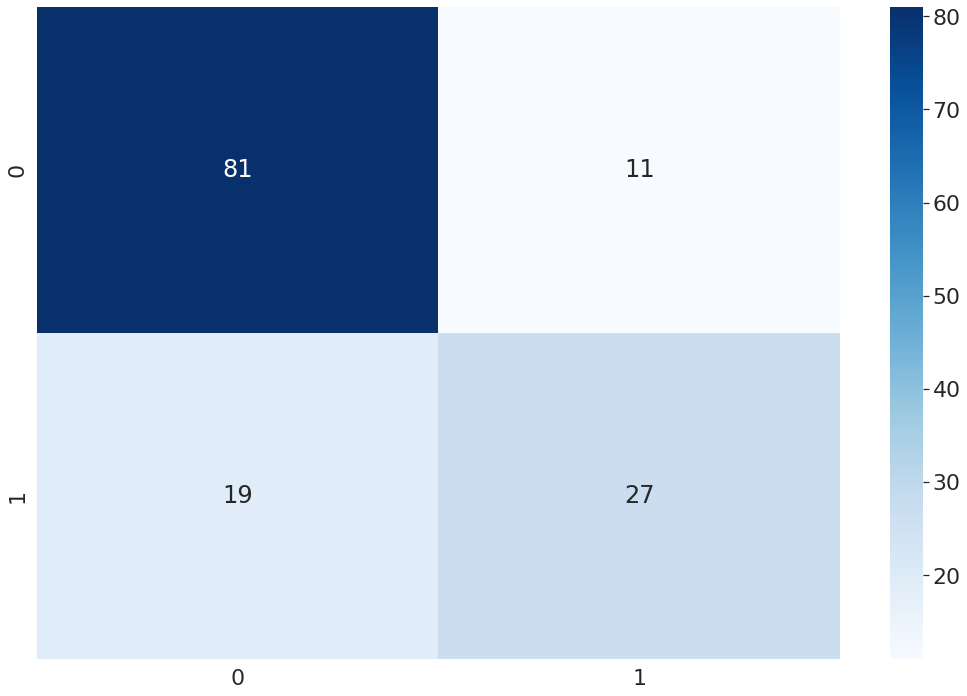

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)
X_test_prediction_KNN = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

print(classification_report(Y_test, X_test_prediction, digits=5))

y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics


In [ ]:
fpr, tpr, thresholds  = metrics.roc_curve(Y_test, X_test_prediction)

In [ ]:
print(fpr, tpr, thresholds, )

[0.         0.11956522 1.        ] [0.         0.58695652 1.        ] [2 1 0]


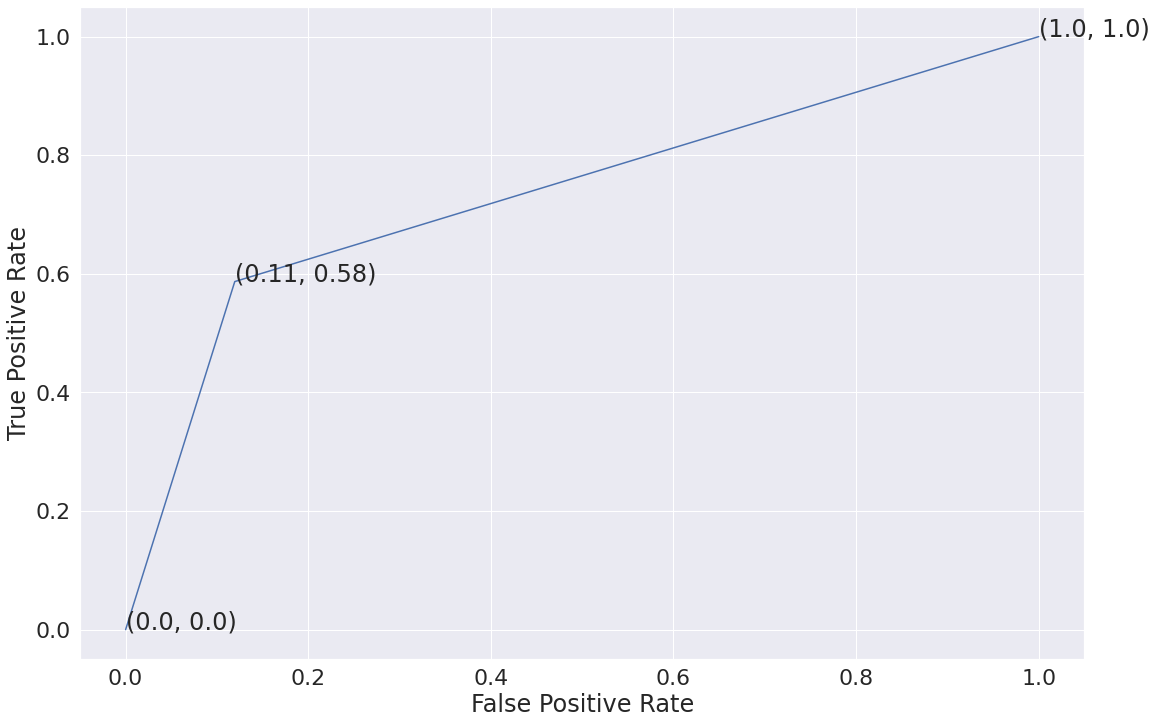

In [ ]:

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

for xy in zip(fpr,tpr):
   plt.annotate('(%.4s, %.4s)' % xy, xy=xy)

plt.show()


In [ ]:
auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(auc)

0.733695652173913


##Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

Accuracy score of the training data :  0.7927272727272727
Accuracy score of the test data :  0.7898550724637681
[[84  8]
 [21 25]]
              precision    recall  f1-score   support

           0    0.80000   0.91304   0.85279        92
           1    0.75758   0.54348   0.63291        46

    accuracy                        0.78986       138
   macro avg    0.77879   0.72826   0.74285       138
weighted avg    0.78586   0.78986   0.77950       138

Patient with Not Diabetes Correctly Detected (True Negatives):  84
Incorrectly Detected (False Positives):  8
Diabetes Patient Missed (False Negatives):  21
Diabetes Detected (True Positives):  25
Total Diabetes:  46
Sensitivy:  0.5434782608695652
Specificity:  0.9130434782608695


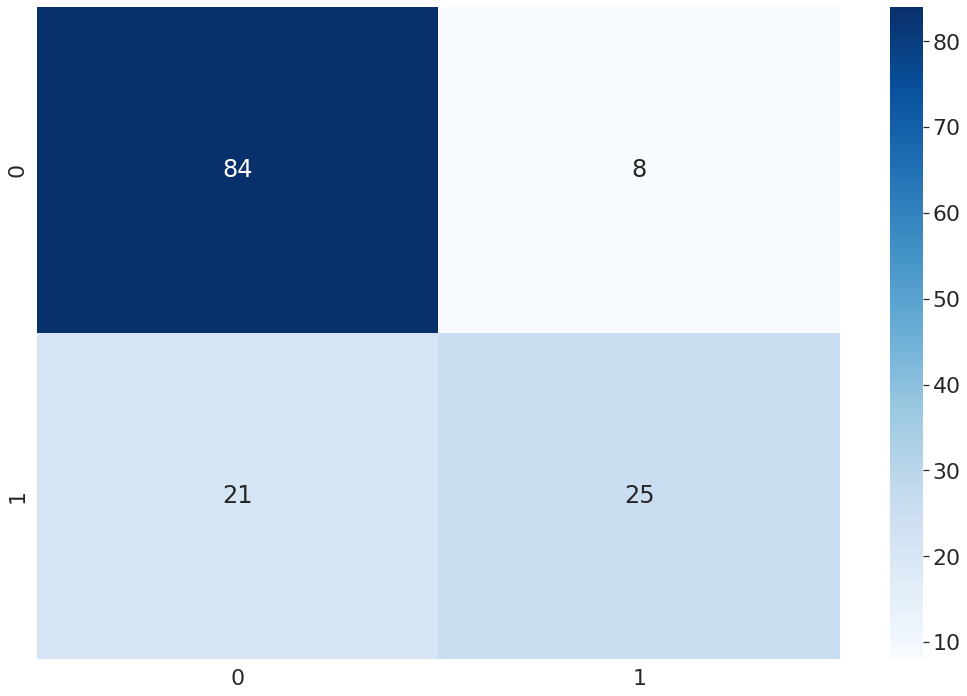

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = model.predict(X_test)

X_test_prediction_LOGR = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

cm=confusion_matrix(Y_test,X_test_prediction)
print(cm)

print(classification_report(Y_test, X_test_prediction, digits=5))

y_true = ["0","1"]
data = cm
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 24}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivy: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [ ]:
fpr, tpr, thresholds  = metrics.roc_curve(Y_test, X_test_prediction)

In [ ]:
print(fpr, tpr, thresholds, )

[0.         0.08695652 1.        ] [0.         0.54347826 1.        ] [2 1 0]


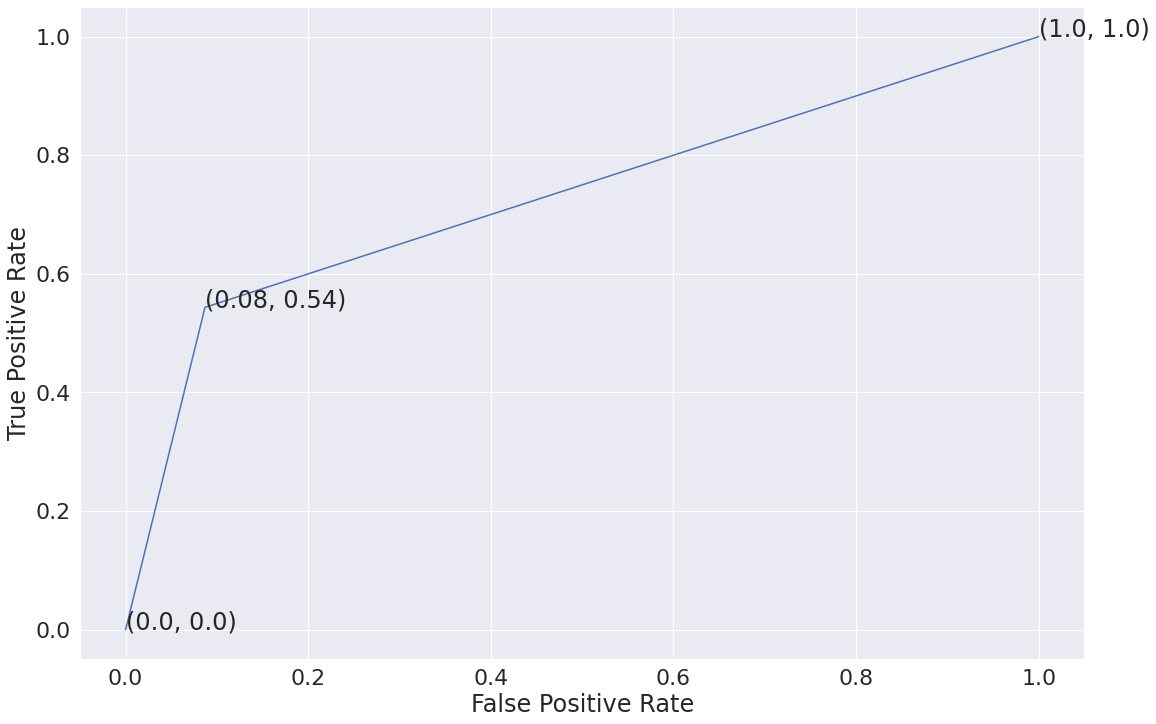

In [ ]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

for xy in zip(fpr,tpr):
   plt.annotate('(%.4s, %.4s)' % xy, xy=xy)

plt.show()

In [ ]:
auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(auc)

0.7282608695652174


Auc and ROC curve for all models

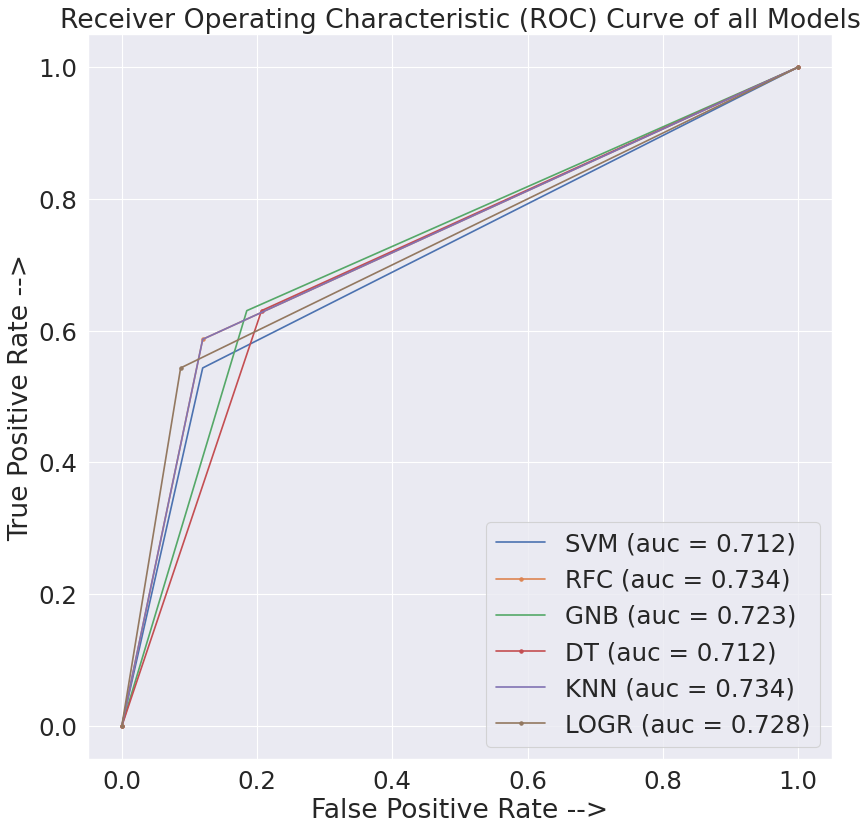

In [ ]:
from sklearn.metrics import roc_curve, auc

RFC_fpr, RFC_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_RFC)
auc_RFC = auc(RFC_fpr, RFC_tpr)

svm_fpr, svm_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_svm_ploy)
auc_svm = auc(svm_fpr, svm_tpr)

GNB_fpr, GNB_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_GNB)
auc_GNB = auc(GNB_fpr, GNB_tpr)

DT_fpr, DT_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_DT)
auc_DT = auc(DT_fpr, DT_tpr)

KNN_fpr, KNN_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_KNN)
auc_KNN = auc(KNN_fpr, KNN_tpr)

LOGR_fpr, LOGR_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_LOGR)
auc_LOGR = auc(LOGR_fpr, LOGR_tpr)


plt.figure(figsize=(12, 12), dpi=80)
plt.title('Receiver Operating Characteristic (ROC) Curve of all Models')
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.plot(RFC_fpr, RFC_tpr, marker='.', label='RFC (auc = %0.3f)' % auc_RFC)

plt.plot(GNB_fpr, GNB_tpr, linestyle='-', label='GNB (auc = %0.3f)' % auc_GNB)

plt.plot(DT_fpr, DT_tpr, marker='.', label='DT (auc = %0.3f)' % auc_DT)

plt.plot(KNN_fpr, KNN_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_KNN)

plt.plot(LOGR_fpr, LOGR_tpr, marker='.', label='LOGR (auc = %0.3f)' % auc_LOGR)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')


plt.legend()

plt.show()

# ALL MODEL Hyperparameter Tuning

Tuning for SVM


In [ ]:
#With Hyper Parameters Tuning

from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.model_selection import ParameterGrid
from sklearn import svm
model_svm =svm.SVC()

params = {'C': [0.1,1,2,3,4,5,6,7,8,9,10] ,
          'kernel': ['linear','rbf' ,'sigmoid'] , 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'decision_function_shape': [ 'ovr' ,'ovo'] }
#grid_search = RandomForestClassifier()
grid_search = GridSearchCV(
    model_svm,
    param_grid=params,
   # cv=5,
    scoring='accuracy',
    n_jobs=-1, refit = True, verbose = 3)

grid_result= grid_search.fit(X_train, Y_train)
# print best parameter after tuning
print('Best Params: ', grid_result.best_params_)

# print how our model looks after hyper-parameter tuning
print('Best estimator: ', grid_result.best_estimator_)

print('Best Score: ', grid_result.best_score_)



Fitting 5 folds for each of 330 candidates, totalling 1650 fits
Best Params:  {'C': 6, 'decision_function_shape': 'ovr', 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=6, gamma=0.01)
Best Score:  0.7909090909090909


Accuracy score after hyperparameter tuning in Svm

In [ ]:
classifier = svm.SVC(kernel='rbf',  gamma= 0.01 , verbose = True,  C=6 , decision_function_shape = 'ovr' , probability=True)

#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print("\n" ,'Accuracy score of the training data : ', training_data_accuracy ,  "\n")

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
X_test_prediction_svm = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

#Cross Val Score
scores = cross_val_score(classifier, X_test, Y_test, cv=10)

print('Accuracy score of the test data : ', test_data_accuracy , "\n")

#CLASSIFICATION REPORT
print(classification_report(Y_test, X_test_prediction, digits=5, zero_division='warn'))

print('Cv Score' , scores)

[LibSVM]
 Accuracy score of the training data :  0.8 

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Accuracy score of the test data :  0.782608695652174 

              precision    recall  f1-score   support

           0    0.79808   0.90217   0.84694        92
           1    0.73529   0.54348   0.62500        46

    accuracy                        0.78261       138
   macro avg    0.76669   0.72283   0.73597       138
weighted avg    0.77715   0.78261   0.77296       138

Cv Score [0.78571429 0.78571429 0.71428571 0.78571429 0.71428571 0.71428571
 0.85714286 0.78571429 0.92307692 0.69230769]


ROC Curve of SVM

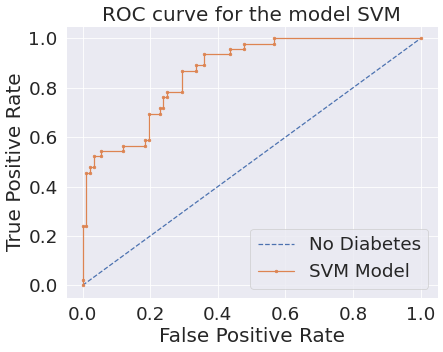

In [ ]:
yhat = classifier.predict_proba(X_test)
pos_probs = yhat[:, 1]
pyplot.figure(figsize=(8, 6), dpi=60)
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Diabetes')
fpr, tpr, _ = roc_curve(Y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='SVM Model')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for the model SVM')
pyplot.legend()
pyplot.show()

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test_prediction)

auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(fpr,tpr,thresholds,"\n")
print(auc)

[0.         0.09782609 1.        ] [0.         0.54347826 1.        ] [2 1 0] 

0.7228260869565217


Cross Validation Score (Precision-Recall Curve)  

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

In [ ]:
scoring = {'prec_macro': 'precision_macro','rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(model, X, Y, scoring=scoring, cv=5, return_train_score=True)
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_prec_macro',
 'test_rec_macro',
 'train_prec_macro',
 'train_rec_macro']

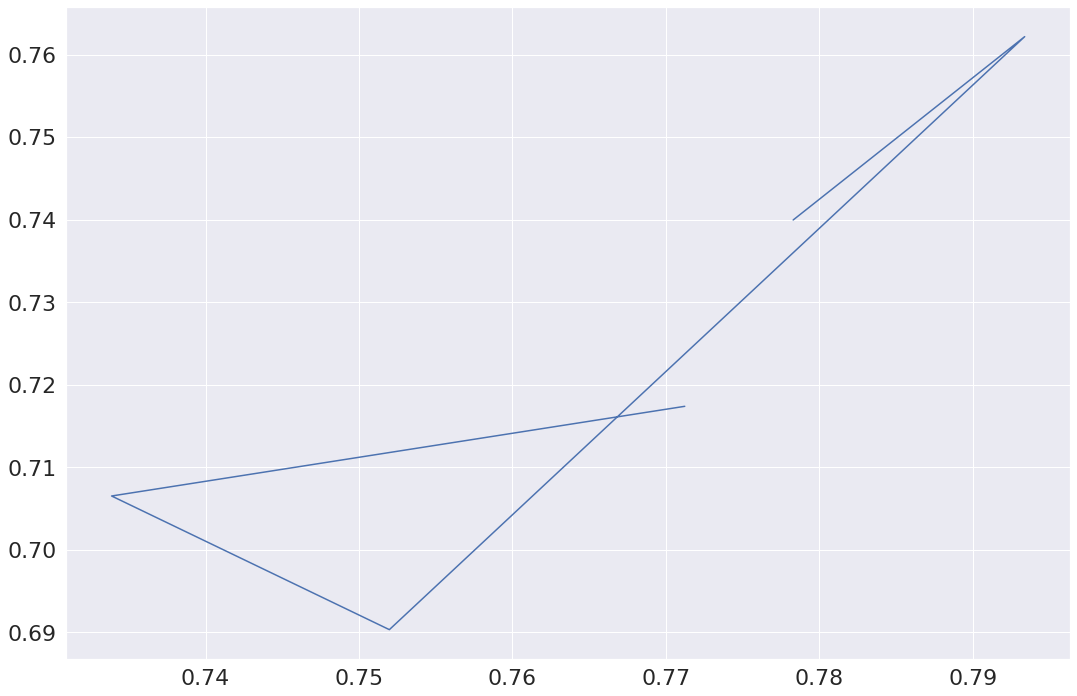

In [ ]:
k = scores['test_rec_macro']
m = scores['test_prec_macro']

pyplot.plot(m,k)

Ploting Confusion Marix for SVM

showing Confusion Matrix 
 [[83  9]
 [21 25]] 

Patient with Not Diabetes Correctly Detected (True Negatives):  83
Incorrectly Detected (False Positives):  9
Diabetes Patient Missed (False Negatives):  21
Diabetes Detected (True Positives):  25
Total Diabetes:  46
Sensitivity:  0.5434782608695652
Specificity:  0.9021739130434783


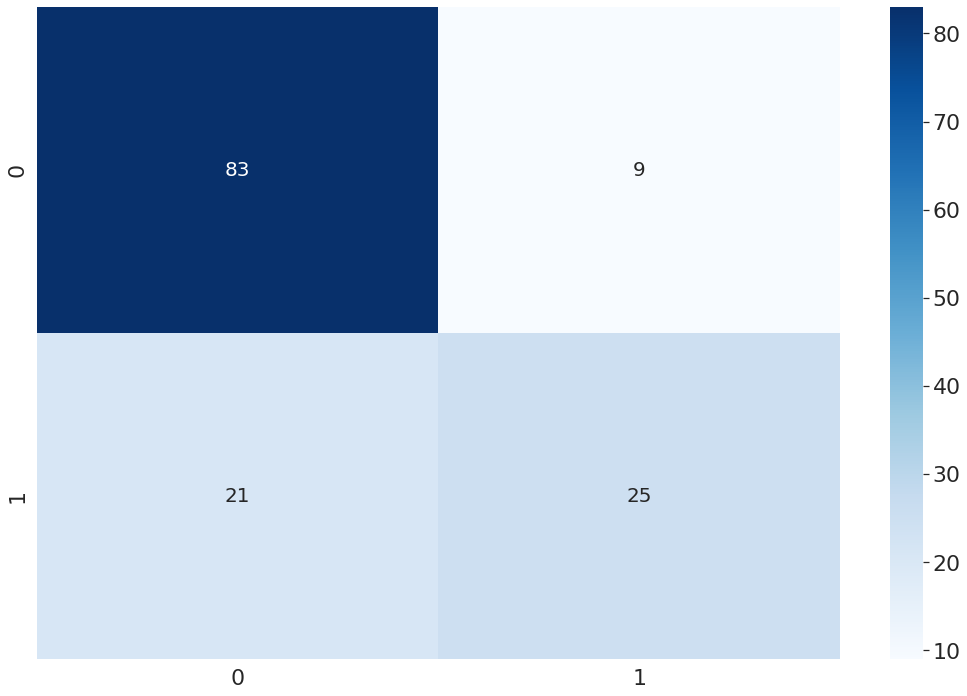

In [ ]:
#Showing Confusion Matrix
cm=confusion_matrix(Y_test,X_test_prediction)
print("showing Confusion Matrix", "\n" , cm, "\n")

#ploting Confusion Matrix
y_true = ["0","1"]
data = cm

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)
plt.savefig('Cm.png', format='png', dpi=300)

In [ ]:
""" !pip install laplotter
from laplotter import LossAccPlotter

plotter = LossAccPlotter(title="This is an example plot",
                        # save_to_filepath="/tmp/my_plot.png",
                         show_regressions=True,
                         show_averages=True,
                         show_loss_plot=True,
                         show_acc_plot=True,
                         show_plot_window=True,
                         x_label="Epoch")

for epoch in range(100):
    # somehow generate loss and accuracy with your model
    loss_train, acc_train = classifier.train()
    loss_val, acc_val = classifier.validate()

    # plot the last values
    plotter.add_values(epoch,
                       loss_train=loss_train, acc_train=acc_train,
                       loss_val=loss_val, acc_val=acc_val)

# As the plot is non-blocking, we should call plotter.block() at the end, to
# change it to the blocking-mode. Otherwise the program would instantly end
# and thereby close the plot.
plotter.block() """

' !pip install laplotter\nfrom laplotter import LossAccPlotter\n\nplotter = LossAccPlotter(title="This is an example plot",\n                        # save_to_filepath="/tmp/my_plot.png",\n                         show_regressions=True,\n                         show_averages=True,\n                         show_loss_plot=True,\n                         show_acc_plot=True,\n                         show_plot_window=True,\n                         x_label="Epoch")\n\nfor epoch in range(100):\n    # somehow generate loss and accuracy with your model\n    loss_train, acc_train = classifier.train()\n    loss_val, acc_val = classifier.validate()\n    \n    # plot the last values\n    plotter.add_values(epoch,\n                       loss_train=loss_train, acc_train=acc_train,\n                       loss_val=loss_val, acc_val=acc_val)\n\n# As the plot is non-blocking, we should call plotter.block() at the end, to\n# change it to the blocking-mode. Otherwise the program would instantly end\n

Tuning for Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()

params ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'criterion' : ['gini', 'entropy'],
     'max_features': ['auto', 'sqrt', 'log2'],
     'min_samples_leaf': [3,5,7,10,15],
     'min_samples_split': [2,5,10],
     'n_estimators': [50] , 'random_state':[123],
          }  # ,100,200,400,600
param_size = ParameterGrid(params)
len(param_size)

grid_search = GridSearchCV(
    model_rfc,
    param_grid=params,
    #cv=5,
    scoring='accuracy',
    n_jobs=-1, refit = True,verbose = 3)

#model_rfc.fit(X_train, Y_train)


grid_result= grid_search.fit(X_train, Y_train)
# print best parameter after tuning
print('Best Params: ', grid_result.best_params_)

# print how our model looks after hyper-parameter tuning
print('Best estimator: ', grid_result.best_estimator_)

print('Best Score: ', grid_result.best_score_)


Fitting 5 folds for each of 900 candidates, totalling 4500 fits
Best Params:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 123}
Best estimator:  RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=5,
                       n_estimators=50, random_state=123)
Best Score:  0.7745454545454546


Accuracy score after hyperparameter tuning in RFC

In [ ]:
#training the support vector Machine Classifier
classifier = sklearn.ensemble.RandomForestClassifier(criterion = 'gini',  max_depth= 10, max_features= 'log2', min_samples_leaf = 5, min_samples_split= 2, n_estimators = 500, random_state = 123)
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print("\n" ,'Accuracy score of the training data : ', training_data_accuracy ,  "\n")

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
X_test_prediction_rfc = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy , "\n")

#CLASSIFICATION REPORT
print(classification_report(Y_test, X_test_prediction, digits=5, zero_division='warn'))




 Accuracy score of the training data :  0.8872727272727273 

Accuracy score of the test data :  0.782608695652174 

              precision    recall  f1-score   support

           0    0.81000   0.88043   0.84375        92
           1    0.71053   0.58696   0.64286        46

    accuracy                        0.78261       138
   macro avg    0.76026   0.73370   0.74330       138
weighted avg    0.77684   0.78261   0.77679       138



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test_prediction)

auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(fpr,tpr,thresholds,"\n")
print(auc)

[0.         0.11956522 1.        ] [0.         0.58695652 1.        ] [2 1 0] 

0.733695652173913


ROC Curve for Random Forest Classifier

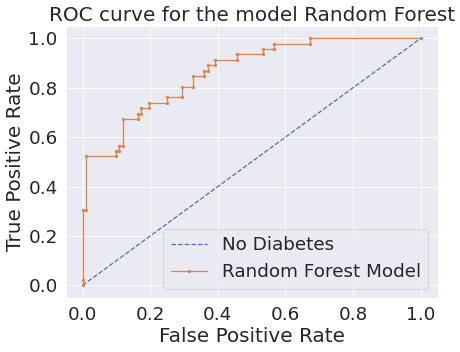

In [ ]:
yhat = classifier.predict_proba(X_test)
pos_probs = yhat[:, 1]
pyplot.figure(figsize=(8, 6), dpi=60)
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Diabetes')
fpr, tpr, _ = roc_curve(Y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='Random Forest Model')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for the model Random Forest')
pyplot.legend()
pyplot.show()

Ploting Confusion Marix for RFC

showing Confusion Matrix 
 [[81 11]
 [19 27]] 

Patient with Not Diabetes Correctly Detected (True Negatives):  81
Incorrectly Detected (False Positives):  11
Diabetes Patient Missed (False Negatives):  19
Diabetes Detected (True Positives):  27
Total Diabetes:  46
Sensitivity:  0.5869565217391305
Specificity:  0.8804347826086957


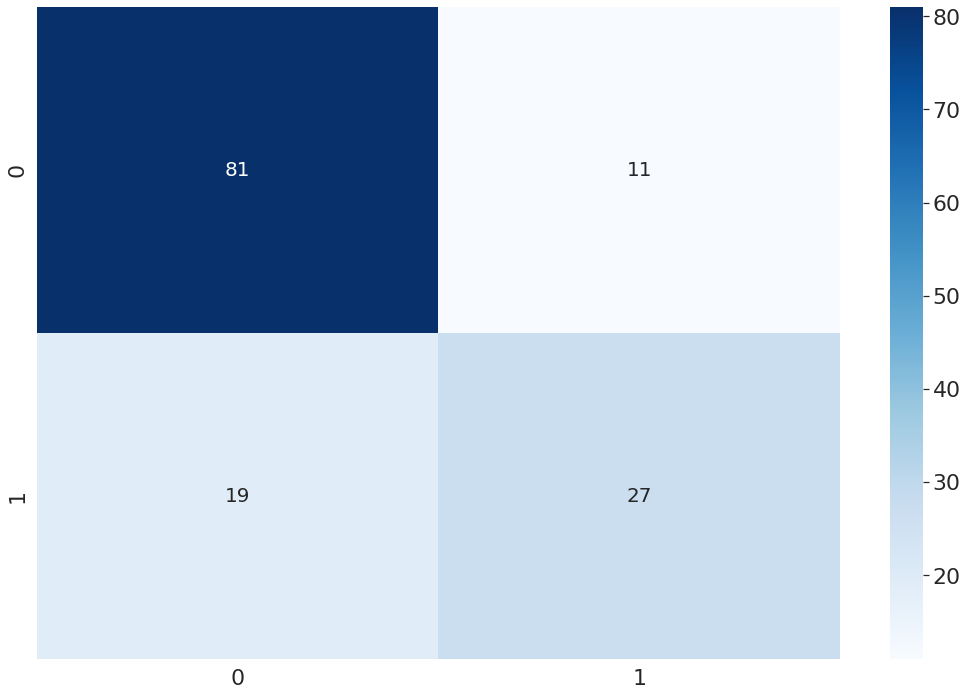

In [ ]:
#Showing Confusion Matrix
cm=confusion_matrix(Y_test,X_test_prediction)
print("showing Confusion Matrix" , "\n", cm, "\n")

#ploting Confusion Matrix
y_true = ["0","1"]
data = cm

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

Tuning for Gaussian Niave Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
#making the instance
model_gnb= GaussianNB()


#Hyper Parameters Set
cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)

params = {'var_smoothing': np.logspace(0,-9, num=100)} #{'var_smoothing': np.<a onclick="parent.postMessage({'referent':'.numpy.logspace'}, '*')">logspace(0,-9, num=100)}
#Making models with hyper parameters sets


grid_search = GridSearchCV(
    model_gnb,
    param_grid=params,
    cv=cv_method,
    scoring='accuracy',
    n_jobs=-1, refit = True, verbose = 3)

#model_rfc.fit(X_train, Y_train)


grid_result= grid_search.fit(X_train, Y_train)
# print best parameter after tuning
print('Best Params: ', grid_result.best_params_)

# print how our model looks after hyper-parameter tuning
print('Best estimator: ', grid_result.best_estimator_)

print('Best Score: ', grid_result.best_score_)


Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Best Params:  {'var_smoothing': 0.3511191734215131}
Best estimator:  GaussianNB(var_smoothing=0.3511191734215131)
Best Score:  0.7666666666666667


Accuracy score after hyperparameter tuning in GB

In [ ]:
#training the support vector Machine Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
classifier = GaussianNB(var_smoothing = 0.3511191734215131)
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print("\n" ,'Accuracy score of the training data : ', training_data_accuracy ,  "\n")

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
X_test_prediction_gnb = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy , "\n")

#CLASSIFICATION REPORT
print(classification_report(Y_test, X_test_prediction, digits=5, zero_division='warn'))


 Accuracy score of the training data :  0.7654545454545455 

Accuracy score of the test data :  0.7898550724637681 

              precision    recall  f1-score   support

           0    0.81188   0.89130   0.84974        92
           1    0.72973   0.58696   0.65060        46

    accuracy                        0.78986       138
   macro avg    0.77081   0.73913   0.75017       138
weighted avg    0.78450   0.78986   0.78336       138



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test_prediction)

auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(fpr,tpr,thresholds,"\n")
print(auc)

[0.         0.10869565 1.        ] [0.         0.58695652 1.        ] [2 1 0] 

0.7391304347826086


ROC curve for the model Gaussian Naive Bayes

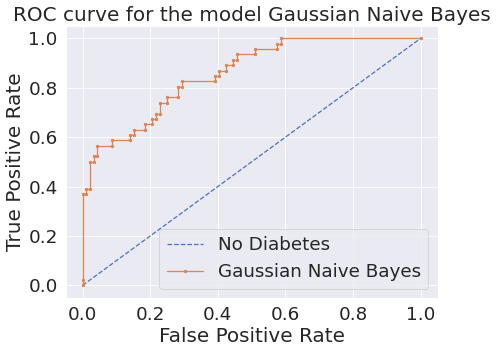

In [ ]:
yhat = classifier.predict_proba(X_test)
pos_probs = yhat[:, 1]
pyplot.figure(figsize=(8, 6), dpi=60)
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Diabetes')
fpr, tpr, _ = roc_curve(Y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='Gaussian Naive Bayes')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for the model Gaussian Naive Bayes')
pyplot.legend()
pyplot.show()

Ploting Confusion Marix for GB

showing Confusion Matrix 
 [[82 10]
 [19 27]] 

Patient with Not Diabetes Correctly Detected (True Negatives):  82
Incorrectly Detected (False Positives):  10
Diabetes Patient Missed (False Negatives):  19
Diabetes Detected (True Positives):  27
Total Diabetes:  46
Sensitivity:  0.5869565217391305
Specificity:  0.8913043478260869


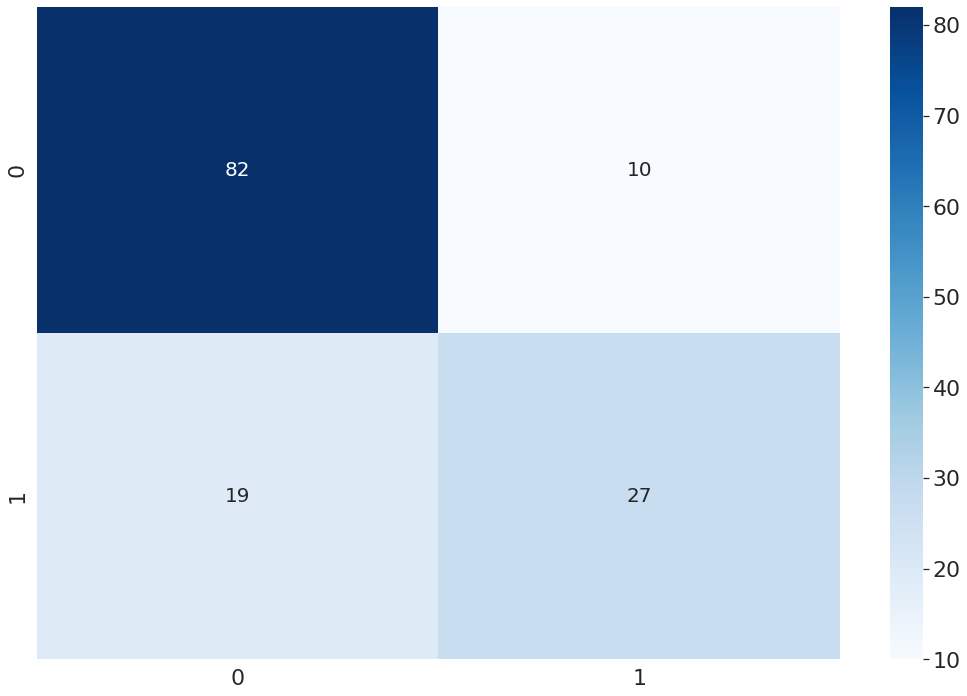

In [ ]:
#Showing Confusion Matrix
cm=confusion_matrix(Y_test,X_test_prediction)
print("showing Confusion Matrix" , "\n", cm, "\n")

#ploting Confusion Matrix
y_true = ["0","1"]
data = cm

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

Tuning for Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#making the instance
model_dt= DecisionTreeClassifier()
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[12345]}
#Making models with hyper parameters sets


grid_search = GridSearchCV(
    model_dt,
    param_grid=params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1, refit = True,verbose = 3)

#model_rfc.fit(X_train, Y_train)


grid_result= grid_search.fit(X_train, Y_train)
# print best parameter after tuning
print('Best Params: ', grid_result.best_params_)

# print how our model looks after hyper-parameter tuning
print('Best estimator: ', grid_result.best_estimator_)

print('Best Score: ', grid_result.best_score_)


Fitting 5 folds for each of 462 candidates, totalling 2310 fits
Best Params:  {'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 15, 'random_state': 12345}
Best estimator:  DecisionTreeClassifier(max_features='auto', min_samples_leaf=6,
                       min_samples_split=15, random_state=12345)
Best Score:  0.7436363636363638


Accuracy score after hyperparameter tuning in DT

In [ ]:
#training the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_features = 'auto', min_samples_leaf = 6, min_samples_split = 15, random_state = 12345 )
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print("\n" ,'Accuracy score of the training data : ', training_data_accuracy ,  "\n")

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
X_test_prediction_dt = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy , "\n")

#CLASSIFICATION REPORT
print(classification_report(Y_test, X_test_prediction, digits=5, zero_division='warn'))


 Accuracy score of the training data :  0.86 

Accuracy score of the test data :  0.7608695652173914 

              precision    recall  f1-score   support

           0    0.83908   0.79348   0.81564        92
           1    0.62745   0.69565   0.65979        46

    accuracy                        0.76087       138
   macro avg    0.73327   0.74457   0.73772       138
weighted avg    0.76854   0.76087   0.76369       138



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test_prediction)

auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(fpr,tpr,thresholds,"\n")
print(auc)

[0.         0.20652174 1.        ] [0.         0.69565217 1.        ] [2 1 0] 

0.7445652173913043


ROC curve for the model Decision Tree

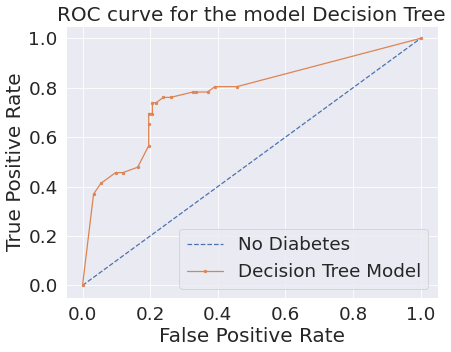

In [ ]:
yhat = classifier.predict_proba(X_test)
pos_probs = yhat[:, 1]
pyplot.figure(figsize=(8, 6), dpi=60)
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Diabetes')
fpr, tpr, _ = roc_curve(Y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='Decision Tree Model')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for the model Decision Tree')
pyplot.legend()
pyplot.show()

Ploting Confusion Marix for DT


showing Confusion Matrix 
 [[73 19]
 [14 32]] 

Patient with Not Diabetes Correctly Detected (True Negatives):  73
Incorrectly Detected (False Positives):  19
Diabetes Patient Missed (False Negatives):  14
Diabetes Detected (True Positives):  32
Total Diabetes:  46
Sensitivity:  0.6956521739130435
Specificity:  0.7934782608695652


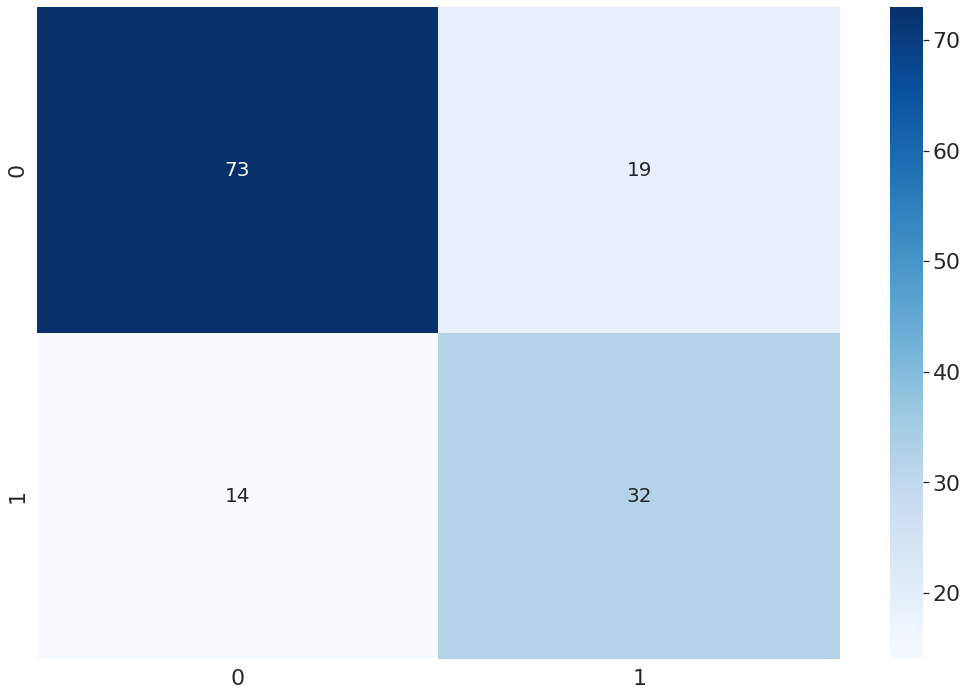

In [ ]:
#Showing Confusion Matrix
cm=confusion_matrix(Y_test,X_test_prediction)
print("showing Confusion Matrix" , "\n", cm, "\n")

#ploting Confusion Matrix
y_true = ["0","1"]
data = cm

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

Tuning for KNearestNeighbors


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model_knn =  KNeighborsClassifier()
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10,13,15],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'metric' : ['minkowski','euclidean','manhattan'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets


grid_search = GridSearchCV(
    model_knn,
    param_grid=params,
   # cv=5,
    scoring='accuracy',
    n_jobs=-1, refit = True,verbose = 3)

#model_rfc.fit(X_train, Y_train)


grid_result= grid_search.fit(X_train, Y_train)
# print best parameter after tuning
print('Best Params: ', grid_result.best_params_)

# print how our model looks after hyper-parameter tuning
print('Best estimator: ', grid_result.best_estimator_)

print('Best Score: ', grid_result.best_score_)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best Params:  {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 13, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(leaf_size=1, n_jobs=-1, n_neighbors=13)
Best Score:  0.7636363636363637


Accuracy score after hyperparameter tuning in KNN

In [ ]:
#training the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm = 'auto', leaf_size = 1, metric = 'minkowski', n_jobs = -1, n_neighbors = 13, weights = 'uniform')
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print("\n" ,'Accuracy score of the training data : ', training_data_accuracy ,  "\n")

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
X_test_prediction_knn = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy , "\n")

#CLASSIFICATION REPORT
print(classification_report(Y_test, X_test_prediction, digits=5, zero_division='warn'))


 Accuracy score of the training data :  0.7763636363636364 

Accuracy score of the test data :  0.7608695652173914 

              precision    recall  f1-score   support

           0    0.78641   0.88043   0.83077        92
           1    0.68571   0.52174   0.59259        46

    accuracy                        0.76087       138
   macro avg    0.73606   0.70109   0.71168       138
weighted avg    0.75284   0.76087   0.75138       138



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test_prediction)

auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(fpr,tpr,thresholds,"\n")
print(auc)

[0.         0.11956522 1.        ] [0.         0.52173913 1.        ] [2 1 0] 

0.7010869565217391


ROC curve for the model K nearest neighbors

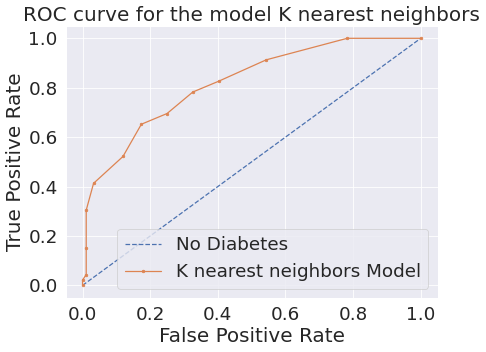

In [ ]:
yhat = classifier.predict_proba(X_test)
pos_probs = yhat[:, 1]
pyplot.figure(figsize=(8, 6), dpi=60)
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Diabetes')
fpr, tpr, _ = roc_curve(Y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='K nearest neighbors Model')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for the model K nearest neighbors')
pyplot.legend()
pyplot.show()

Ploting Confusion Marix for KNN

showing Confusion Matrix 
 [[81 11]
 [22 24]] 

Patient with Not Diabetes Correctly Detected (True Negatives):  81
Incorrectly Detected (False Positives):  11
Diabetes Patient Missed (False Negatives):  22
Diabetes Detected (True Positives):  24
Total Diabetes:  46
Sensitivity:  0.5217391304347826
Specificity:  0.8804347826086957


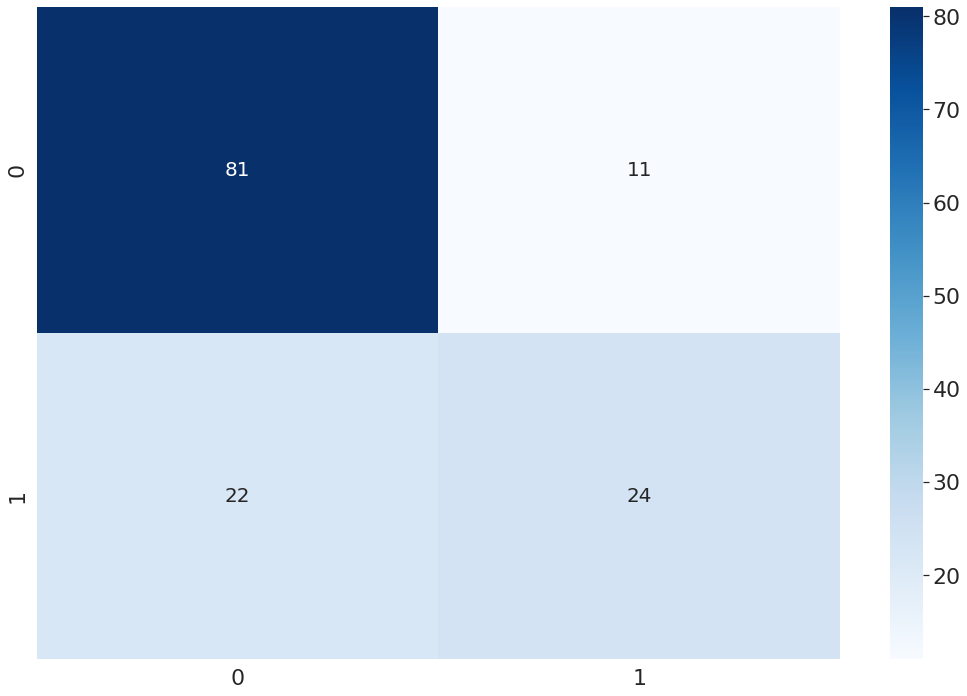

In [ ]:
#Showing Confusion Matrix
cm=confusion_matrix(Y_test,X_test_prediction)
print("showing Confusion Matrix" , "\n", cm, "\n")

#ploting Confusion Matrix
y_true = ["0","1"]
data = cm

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

In [ ]:
#tuning the LogisticRegression
from sklearn.linear_model import LogisticRegression
#making the instance
model_logr =  LogisticRegression()
#Hyper Parameters Set
params = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
#Making models with hyper parameters sets


grid_search = GridSearchCV(
    model_logr,
    param_grid=params,
   # cv=5,
    scoring='accuracy',
    n_jobs=-1, refit = True,verbose = 3)

#model_rfc.fit(X_train, Y_train)


grid_result= grid_search.fit(X_train, Y_train)
# print best parameter after tuning
print('Best Params: ', grid_result.best_params_)

# print how our model looks after hyper-parameter tuning
print('Best estimator: ', grid_result.best_estimator_)

print('Best Score: ', grid_result.best_score_)


Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Best Params:  {'C': 0.03359818286283781, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best estimator:  LogisticRegression(C=0.03359818286283781, solver='liblinear')
Best Score:  0.7836363636363636



3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

----------------------------------

Accuracy score after hyperparameter tuning in LOGR

In [ ]:
#training the  LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 0.03359818286283781, max_iter = 100, penalty = 'l2', solver = 'liblinear')
classifier.fit(X_train, Y_train)

# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print("\n" ,'Accuracy score of the training data : ', training_data_accuracy ,  "\n")

# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
X_test_prediction_logr = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy score of the test data : ', test_data_accuracy , "\n")

#CLASSIFICATION REPORT
print(classification_report(Y_test, X_test_prediction, digits=5, zero_division='warn'))


 Accuracy score of the training data :  0.7963636363636364 

Accuracy score of the test data :  0.7971014492753623 

              precision    recall  f1-score   support

           0    0.80769   0.91304   0.85714        92
           1    0.76471   0.56522   0.65000        46

    accuracy                        0.79710       138
   macro avg    0.78620   0.73913   0.75357       138
weighted avg    0.79336   0.79710   0.78810       138



In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test_prediction)

auc = metrics.roc_auc_score(Y_test, X_test_prediction)

print(fpr,tpr,thresholds,"\n")
print(auc)

[0.         0.08695652 1.        ] [0.         0.56521739 1.        ] [2 1 0] 

0.7391304347826086


ROC curve for the model LogisticRegression

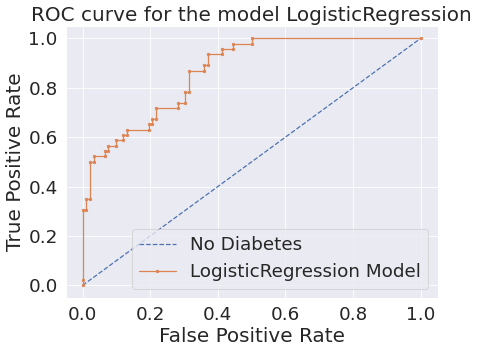

In [ ]:
yhat = classifier.predict_proba(X_test)
pos_probs = yhat[:, 1]
pyplot.figure(figsize=(8, 6), dpi=60)
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Diabetes')
fpr, tpr, _ = roc_curve(Y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='LogisticRegression Model')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve for the model LogisticRegression')
pyplot.legend()
pyplot.show()

Ploting Confusion Marix for LOGR

showing Confusion Matrix 
 [[84  8]
 [20 26]] 

Patient with Not Diabetes Correctly Detected (True Negatives):  84
Incorrectly Detected (False Positives):  8
Diabetes Patient Missed (False Negatives):  20
Diabetes Detected (True Positives):  26
Total Diabetes:  46
Sensitivity:  0.5652173913043478
Specificity:  0.9130434782608695


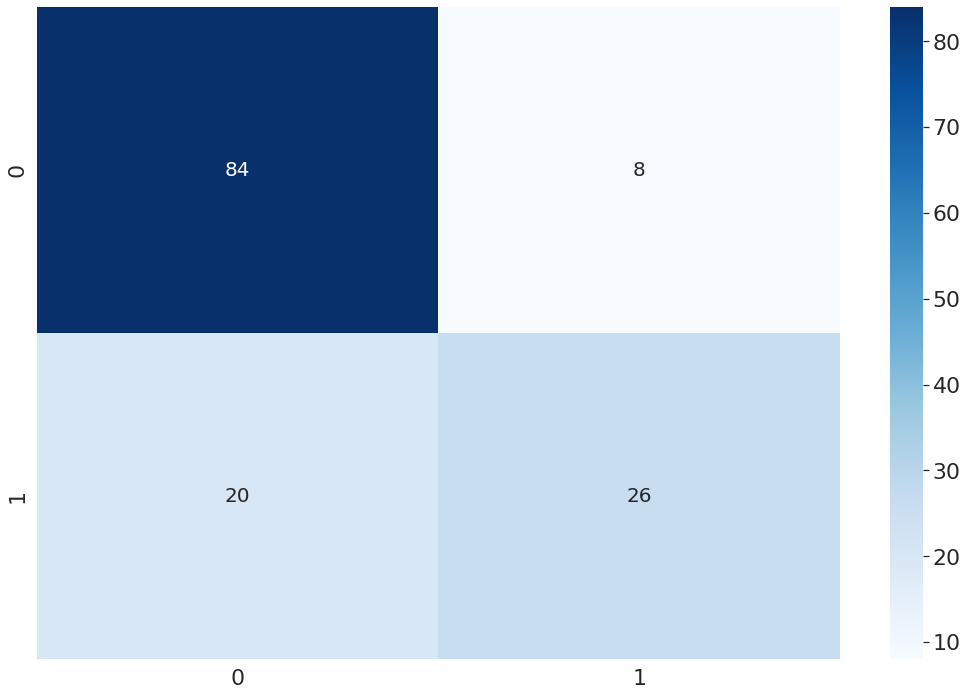

In [ ]:
#Showing Confusion Matrix
cm=confusion_matrix(Y_test,X_test_prediction)
print("showing Confusion Matrix" , "\n", cm, "\n")

#ploting Confusion Matrix
y_true = ["0","1"]
data = cm

print('Patient with Not Diabetes Correctly Detected (True Negatives): ', cm[0][0])
print('Incorrectly Detected (False Positives): ', cm[0][1])
print('Diabetes Patient Missed (False Negatives): ', cm[1][0])
print('Diabetes Detected (True Positives): ', cm[1][1])
print('Total Diabetes: ', np.sum(cm[1]))
print('Sensitivity: ',cm[1][1]/(cm[1][1]+cm[1][0]))
print('Specificity: ',cm[0][0]/(cm[0][0]+cm[0][1]))

df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
sn.set(font_scale=2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt="d")
plt.savefig('Cm.pdf', format='pdf', dpi=300)

ROC and AUC Curve after hyperparametertuning all models

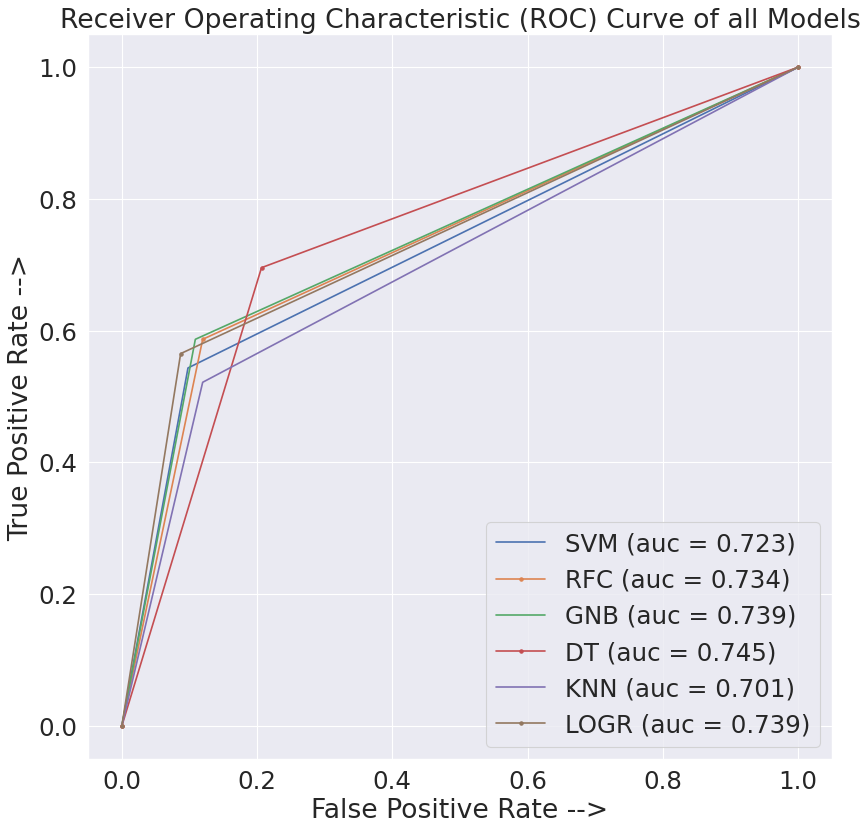

In [ ]:
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_svm)
auc_svm = auc(svm_fpr, svm_tpr)

RFC_fpr, RFC_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_rfc)
auc_RFC = auc(RFC_fpr, RFC_tpr)

GNB_fpr, GNB_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_gnb)
auc_GNB = auc(GNB_fpr, GNB_tpr)

DT_fpr, DT_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_dt)
auc_DT = auc(DT_fpr, DT_tpr)

KNN_fpr, KNN_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_knn)
auc_KNN = auc(KNN_fpr, KNN_tpr)

LOGR_fpr, LOGR_tpr, threshold = metrics.roc_curve(Y_test, X_test_prediction_logr)
auc_LOGR = auc(LOGR_fpr, LOGR_tpr)


plt.figure(figsize=(12, 12), dpi=80)
plt.title('Receiver Operating Characteristic (ROC) Curve of all Models')
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)

plt.plot(RFC_fpr, RFC_tpr, marker='.', label='RFC (auc = %0.3f)' % auc_RFC)

plt.plot(GNB_fpr, GNB_tpr, linestyle='-', label='GNB (auc = %0.3f)' % auc_GNB)

plt.plot(DT_fpr, DT_tpr, marker='.', label='DT (auc = %0.3f)' % auc_DT)

plt.plot(KNN_fpr, KNN_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_KNN)

plt.plot(LOGR_fpr, LOGR_tpr, marker='.', label='LOGR (auc = %0.3f)' % auc_LOGR)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')


plt.legend()

plt.show()

## Validation scores of all base models after hyperparameter tuning

LOR: 0.780563 (0.034333)
KNN: 0.748593 (0.030061)
DTC: 0.722400 (0.037340)
RFC: 0.770439 (0.041493)
SVM: 0.784953 (0.029884)
GNB: 0.764578 (0.016280)


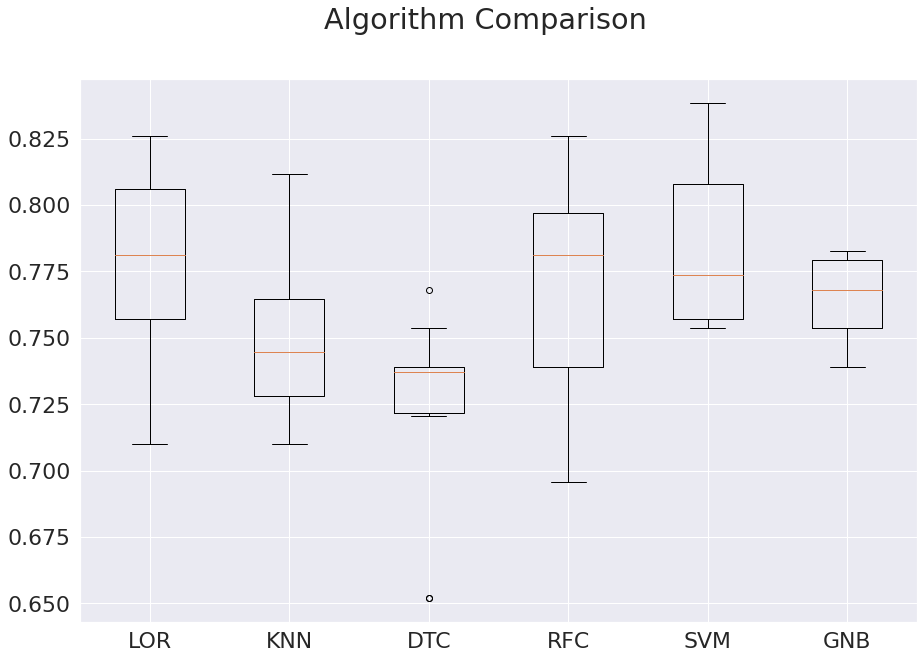

In [ ]:
# Validation scores of all base models

models = []
models.append(('LOR', LogisticRegression(C = 0.03359818286283781, max_iter = 100, penalty = 'l2', solver = 'liblinear')))
models.append(('KNN', KNeighborsClassifier(algorithm = 'auto', leaf_size = 1, metric = 'minkowski', n_jobs = -1, n_neighbors = 13, weights = 'uniform')))
models.append(('DTC', DecisionTreeClassifier(max_features = 'auto', min_samples_leaf = 6, min_samples_split = 15)))
models.append(('RFC', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(kernel='rbf', gamma= 0.01 , C=6 ,decision_function_shape = 'ovr')))
models.append(('GNB',  GaussianNB( var_smoothing = 0.3511191734215131)))


# evaluate each model in turn
results = []
names = []

for name, model in models:

        kfold = KFold(n_splits = 10, random_state = 12345 , shuffle =True)
        cv_results = cross_val_score(model, X, Y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Validation scores of all base models

LOR: 0.786381 (0.032839)
KNN: 0.747187 (0.038443)
DTC: 0.707992 (0.054133)
RFC: 0.770439 (0.041493)
SVM: 0.770503 (0.047893)
GNB: 0.757353 (0.033185)


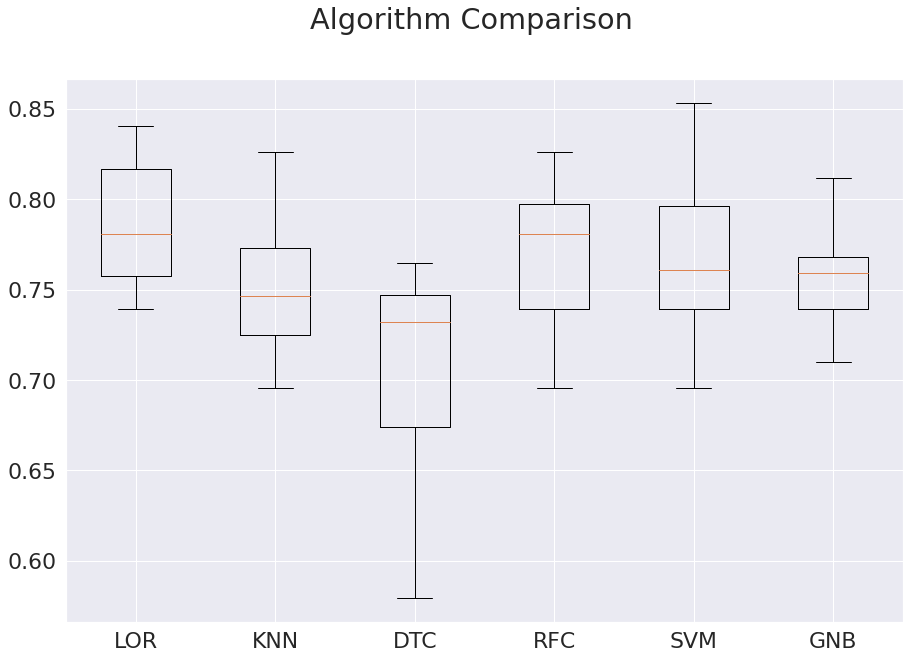

In [ ]:
# Validation scores of all base models

models = []
models.append(('LOR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state = 12345)))
models.append(('RFC', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('GNB',  GaussianNB()))


# evaluate each model in turn
results = []
names = []

for name, model in models:

        kfold = KFold(n_splits = 10, random_state = 12345 , shuffle =True)
        cv_results = cross_val_score(model, X, Y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Data Visulization
Correlation Matrix

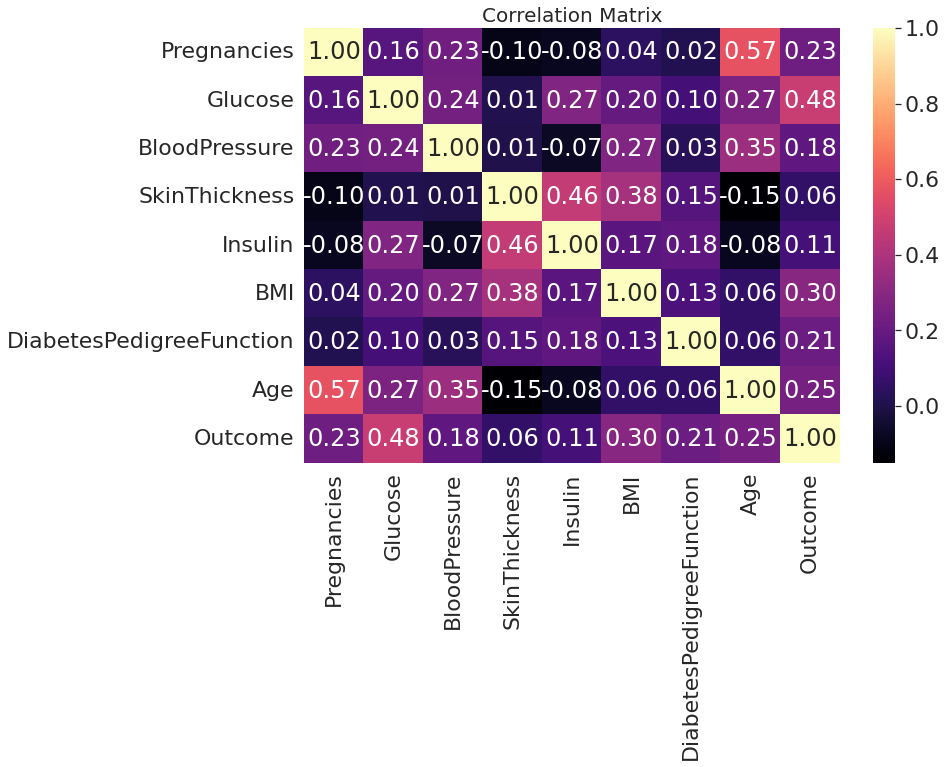

In [ ]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [12,8])
sn.heatmap(new_diabetes_dataset.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

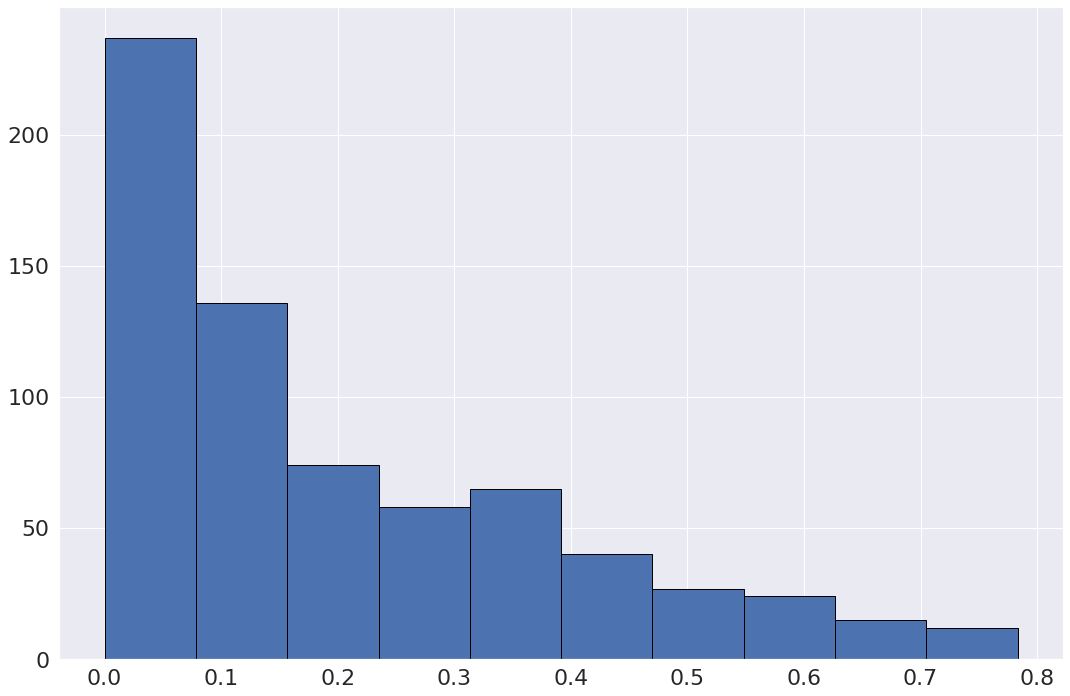

In [ ]:
# The histagram of the Age variable was reached.
new_diabetes_dataset["Age"].hist(edgecolor = "black")

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


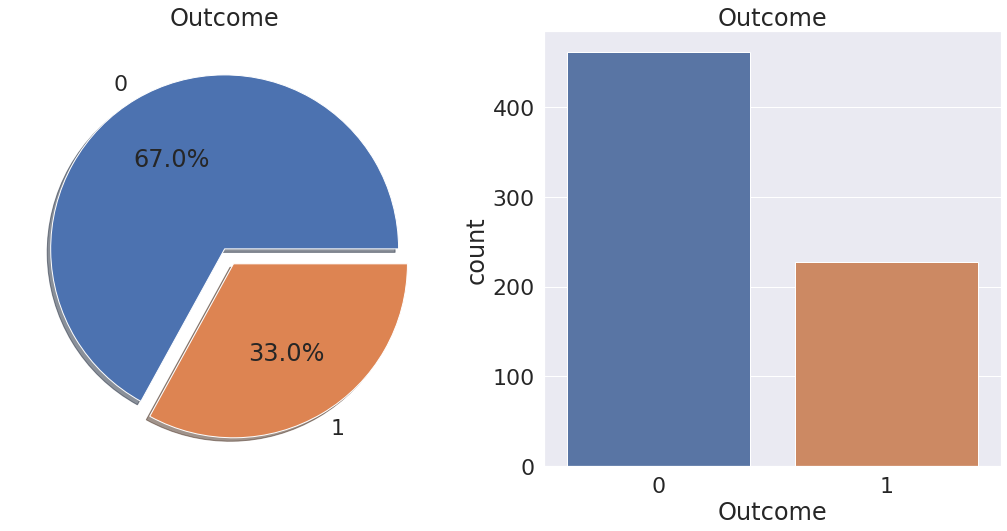

In [ ]:
# The distribution of the outcome variable in the data was examined and visualized.
f,ax=plt.subplots(1,2,figsize=(18,8))
new_diabetes_dataset['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sn.countplot('Outcome',data=new_diabetes_dataset,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

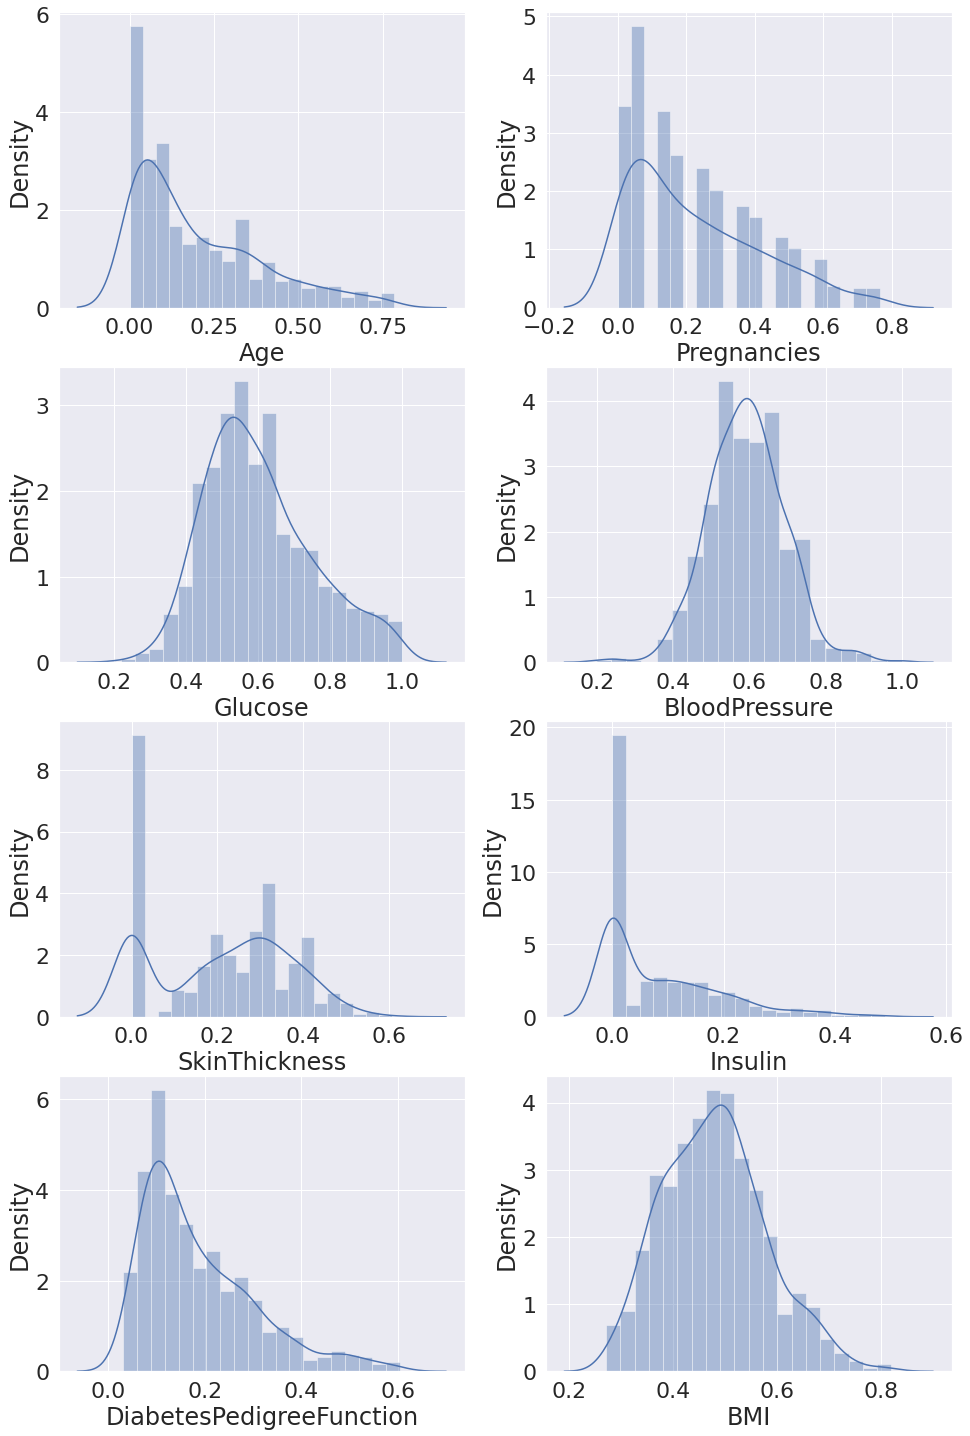

In [ ]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,25))
sn.distplot(new_diabetes_dataset.Age, bins = 20, ax=ax[0,0])
sn.distplot(new_diabetes_dataset.Pregnancies, bins = 20, ax=ax[0,1])
sn.distplot(new_diabetes_dataset.Glucose, bins = 20, ax=ax[1,0])
sn.distplot(new_diabetes_dataset.BloodPressure, bins = 20, ax=ax[1,1])
sn.distplot(new_diabetes_dataset.SkinThickness, bins = 20, ax=ax[2,0])
sn.distplot(new_diabetes_dataset.Insulin, bins = 20, ax=ax[2,1])
sn.distplot(new_diabetes_dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sn.distplot(new_diabetes_dataset.BMI, bins = 20, ax=ax[3,1])

# 3) Feature Engineering

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [ ]:
df=diabetes_dataset

In [ ]:
li = df["BMI"].to_list()

In [ ]:
len(li)

768

In [ ]:
li = df["BMI"].to_list()
for i in range(0,len(li)):
    if li[i]<=18.5:
        li[i] = "Underweight"
    elif li[i] > 18.5 and li[i] <=24.9:
        li[i]= "Normal"
    elif li[i] > 24.9 and li[i] <=29.9:
        li[i]= "Overweight"
    elif li[i] > 29.9 and li[i] <=34.9:
        li[i]= "Obesity 1"
    elif li[i] > 34.9 and li[i] <=39.9:
        li[i]= "Obesity 2"
    elif li[i] > 39.9:
        li[i]= "Obesity 3"
df["BMI"]=li

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,Underweight,0.259091,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,Underweight,0.145041,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,Underweight,0.277686,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,Underweight,0.069008,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,Underweight,0.945455,0.200000,1


In [ ]:
# A categorical variable creation process is performed according to the insulin value.
li = df["Insulin"].to_list()
for i in range(len(li)):
    if li[i] >=16 and li[i]<=166:
        li[i] = "Normal"
    else:
        li[i]="Abnormal"
df["Insulin"]=li

In [ ]:
df2=df

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,Abnormal,Underweight,0.259091,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,Abnormal,Underweight,0.145041,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,Abnormal,Underweight,0.277686,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,Abnormal,Underweight,0.069008,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,Abnormal,Underweight,0.945455,0.200000,1


In [ ]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
li = df["Glucose"].to_list()

for i in range(len(li)):
    if li[i] <=70:
        li[i]="Low"
    elif li[i] >70 and li[i] <= 99:
        li[i]="Normal"
    elif li[i] >99 and li[i] <= 126:
        li[i]="High"
    elif li[i] > 126:
        li[i]="Extreme"
df["Glucose"]=li

In [ ]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,Low,0.590164,0.353535,Abnormal,Underweight,0.259091,0.483333,1
1,0.058824,Low,0.540984,0.292929,Abnormal,Underweight,0.145041,0.166667,0
2,0.470588,Low,0.524590,0.000000,Abnormal,Underweight,0.277686,0.183333,1
3,0.058824,Low,0.540984,0.232323,Abnormal,Underweight,0.069008,0.000000,0
4,0.000000,Low,0.327869,0.353535,Abnormal,Underweight,0.945455,0.200000,1
5,0.294118,Low,0.606557,0.000000,Abnormal,Underweight,0.083058,0.150000,0
6,0.176471,Low,0.409836,0.323232,Abnormal,Underweight,0.102479,0.083333,1
7,0.588235,Low,0.000000,0.000000,Abnormal,Underweight,0.055372,0.133333,0
8,0.117647,Low,0.573770,0.454545,Abnormal,Underweight,0.065289,0.533333,1
9,0.470588,Low,0.786885,0.000000,Abnormal,Underweight,0.095868,0.550000,1


Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [ ]:
df["Glucose"] = df["Glucose"].astype('category')
print(df.dtypes)
df["Glucose"] = df["Glucose"].cat.codes

Pregnancies                  float64
Glucose                     category
BloodPressure                float64
SkinThickness                float64
Insulin                       object
BMI                           object
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                        int64
dtype: object


In [ ]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0,0.590164,0.353535,Abnormal,Underweight,0.259091,0.483333,1
1,0.058824,0,0.540984,0.292929,Abnormal,Underweight,0.145041,0.166667,0
2,0.470588,0,0.524590,0.000000,Abnormal,Underweight,0.277686,0.183333,1
3,0.058824,0,0.540984,0.232323,Abnormal,Underweight,0.069008,0.000000,0
4,0.000000,0,0.327869,0.353535,Abnormal,Underweight,0.945455,0.200000,1
5,0.294118,0,0.606557,0.000000,Abnormal,Underweight,0.083058,0.150000,0
6,0.176471,0,0.409836,0.323232,Abnormal,Underweight,0.102479,0.083333,1
7,0.588235,0,0.000000,0.000000,Abnormal,Underweight,0.055372,0.133333,0
8,0.117647,0,0.573770,0.454545,Abnormal,Underweight,0.065289,0.533333,1
9,0.470588,0,0.786885,0.000000,Abnormal,Underweight,0.095868,0.550000,1


In [ ]:
df["Insulin"] = df["Insulin"].astype('category')
print(df.dtypes)
df["Insulin"] = df["Insulin"].cat.codes

Pregnancies                  float64
Glucose                         int8
BloodPressure                float64
SkinThickness                float64
Insulin                     category
BMI                           object
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                        int64
dtype: object


In [ ]:
df["BMI"] = df["BMI"].astype('category')
print(df.dtypes)
df["BMI"] = df["BMI"].cat.codes

Pregnancies                  float64
Glucose                         int8
BloodPressure                float64
SkinThickness                float64
Insulin                         int8
BMI                         category
DiabetesPedigreeFunction     float64
Age                          float64
Outcome                        int64
dtype: object


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0,0.590164,0.353535,0,0,0.259091,0.483333,1
1,0.058824,0,0.540984,0.292929,0,0,0.145041,0.166667,0
2,0.470588,0,0.524590,0.000000,0,0,0.277686,0.183333,1
3,0.058824,0,0.540984,0.232323,0,0,0.069008,0.000000,0
4,0.000000,0,0.327869,0.353535,0,0,0.945455,0.200000,1


Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
mymodel = Sequential()
mymodel.add(Dense(12, input_dim=8, activation='relu'))
mymodel.add(Dense(8, activation='relu'))
mymodel.add(Dense(1, activation='sigmoid'))

# Compile the model
mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Fit the model
mymodel.fit(X_train, Y_train, epochs=150, batch_size=10)

Epoch 1/150
55/55 [==============================] - 1s 2ms/step - loss: 0.6890 - accuracy: 0.5255
Epoch 2/150
55/55 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6909
Epoch 3/150
55/55 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7291
Epoch 4/150
55/55 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.7509
Epoch 5/150
55/55 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7600
Epoch 6/150
55/55 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7709
Epoch 7/150
55/55 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7673
Epoch 8/150
55/55 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7782
Epoch 9/150
55/55 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7782
Epoch 10/150
55/55 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.7764
Epoch 11/

In [ ]:
_, accuracy = mymodel.evaluate(X_train, Y_train)
#training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : %.2f' %(accuracy*100))

18/18 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.8527
Accuracy score of the training data : 85.27


In [ ]:
_, accuracy = mymodel.evaluate(X_test, Y_test)
#training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the testing data : %.2f' %(accuracy*100))

5/5 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.7971
Accuracy score of the testing data : 79.71


In [ ]:
X_train.shape

(550, 8)

# From colab notebook to pdf

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

#Mount your google drive to get access to your ipynb files

from google.colab import drive
drive.mount('/content/drive')

!cp "/content/drive/MyDrive/Colab Notebooks/Diabetes_Prediction-1.ipynb" ./
#Then you can run the converter.

!jupyter nbconvert --to PDF "Diabetes_Prediction-1.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain